In [1]:

import numpy as np
import copy
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
import os
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import seed

In [2]:
np.random.seed(1)
df=pd.read_csv(r"rainfall_data.csv")

In [5]:
df

2.9.1


In [129]:
max_rainfall = data['rainfall'].max()
print("Maximum rainfall value: ", max_rainfall)

Maximum rainfall value:  80.63607437


In [1]:
import pandas as pd

# Read the data from the CSV file
data = df

# Define the threshold value
threshold = 30

# Add a new column to indicate if the rainfall is extreme or normal
data['rainfall_category'] = ['Extreme' if rainfall > threshold else 'Normal' for rainfall in data['rainfall']]

# Print the updated dataset
data

NameError: name 'df' is not defined

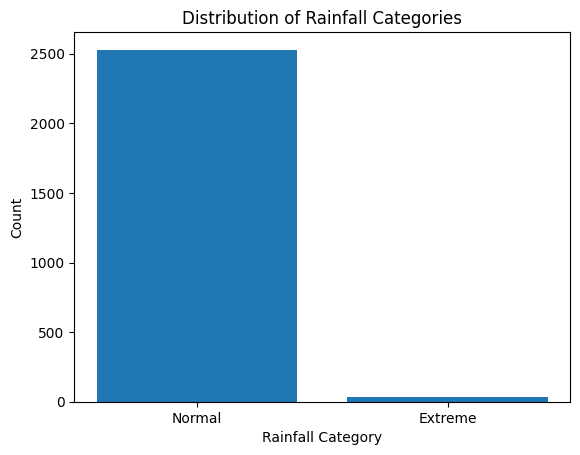

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of extreme and normal categories
counts = data['rainfall_category'].value_counts()

# Create a bar chart to show the count of extreme and normal categories
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('Rainfall Category')
plt.ylabel('Count')
plt.title('Distribution of Rainfall Categories')

# Show the chart
plt.show()


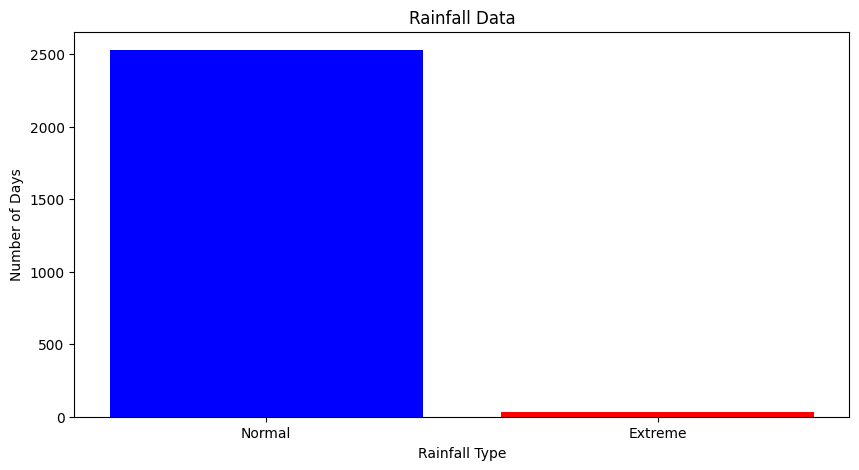

Epoch 1/100
64/64 [==============================] - 1s 5ms/step - loss: 0.2926 - val_loss: 0.2694
Epoch 2/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1817 - val_loss: 0.2110
Epoch 3/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1536 - val_loss: 0.1987
Epoch 4/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1462 - val_loss: 0.1943
Epoch 5/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1430 - val_loss: 0.1909
Epoch 6/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1406 - val_loss: 0.1892
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1386 - val_loss: 0.1858
Epoch 8/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1365 - val_loss: 0.1847
Epoch 9/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1347 - val_loss: 0.1817
Epoch 10/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1333 - val_loss: 0.1805
Epoch 11/

64/64 [==============================] - 0s 2ms/step - loss: 0.1155 - val_loss: 0.1591
Epoch 84/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1148 - val_loss: 0.1581
Epoch 85/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1148 - val_loss: 0.1587
Epoch 86/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1141 - val_loss: 0.1571
Epoch 87/100
64/64 [==============================] - 0s 1ms/step - loss: 0.1135 - val_loss: 0.1575
Epoch 88/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1118 - val_loss: 0.1542
Epoch 89/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1109 - val_loss: 0.1532
Epoch 90/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1094 - val_loss: 0.1513
Epoch 91/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1080 - val_loss: 0.1515
Epoch 92/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1061 - val_loss: 0.1471
Epoch 93/100


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 30]
extreme_data = data[data['rainfall'] > 30]

# Plot the normal and extreme rainfall data
plt.figure(figsize=(10, 5))
plt.bar('Normal', len(normal_data), color='blue')
plt.bar('Extreme', len(extreme_data), color='red')
plt.title('Rainfall Data')
plt.xlabel('Rainfall Type')
plt.ylabel('Number of Days')
plt.show()

# Normalize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(normal_data[['windspeed', 'tpw', 'rainfall']].values)

# Define the autoencoder architecture
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)
decoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(decoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(3, activation=None)(decoded)

# Create the autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='logcosh')

# Train the model
history = autoencoder.fit(train_data, train_data, epochs=100, batch_size=32, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = scaler.transform(data[['windspeed', 'tpw', 'rainfall']].values)
predicted_data = autoencoder.predict(test_data)
print("predicted data = {}".format(predicted_data))
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.699999999999998
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Save the predicted rainfall data to a CSV file
data.to_csv('predicted_rainfall.csv', index=False)

In [67]:
pre_df=pd.read_csv("predicted_rainfall.csv")

In [3]:
extreme_data

,date,windspeed,tpw,rainfall
41,7/12/2000,23.003010,0.016358,33.846075
552,8/4/2004,21.769238,0.043448,44.404364
876,6/23/2007,23.908970,0.331606,49.356381
900,7/17/2007,19.211468,0.030241,32.941690
920,8/6/2007,17.366877,0.022628,31.609187
1033,7/28/2008,20.585272,0.014900,32.559895
1143,7/16/2009,21.342918,0.037500,38.754120
1144,7/17/2009,21.451813,0.105873,39.511546
1145,7/18/2009,16.981620,0.104322,38.342482
1343,6/2/2011,12.654827,0.550524,34.993438


In [4]:
threshold=30
pre_df['actuall_rainfall_class'] = np.where(data['rainfall'] <= threshold, 'Normal', 'Extreme')

NameError: name 'pre_df' is not defined

In [73]:
pre_df

,date,windspeed,tpw,rainfall,predicted_rainfall,error,rainfall_class,actuall_rainfall_class
0,6/1/2000,12.245595,0.033285,4.688589,-0.027577,4.716165,Normal,Normal
1,6/2/2000,12.825491,0.044874,11.330589,-0.027577,11.358166,Extreme,Extreme
2,6/3/2000,12.921664,0.010243,6.894713,-0.027577,6.922290,Normal,Normal
3,6/4/2000,15.149001,0.036881,4.613324,-0.027577,4.640901,Normal,Normal
4,6/5/2000,18.495907,0.139491,8.111635,-0.027577,8.139212,Normal,Normal
...,...,...,...,...,...,...,...,...
2557,9/26/2020,5.577215,0.009963,4.467977,-0.027577,4.495553,Normal,Normal
2558,9/27/2020,5.184293,0.002341,1.572182,-0.027577,1.599758,Normal,Normal
2559,9/28/2020,4.469007,0.000867,1.819019,-0.027577,1.846596,Normal,Normal
2560,9/29/2020,4.259090,0.001416,2.198017,-0.027577,2.225594,Normal,Normal


In [64]:
# Define a range of threshold values to try
thresholds = np.arange(0.5, 10.0, 0.1)

# Initialize variables to store the best threshold and the lowest error
best_threshold = 0.0
lowest_error = float('inf')

# Loop over the threshold values and calculate the error for each
for threshold in thresholds:
    # Classify the rainfall data into normal and extreme based on the threshold
    pre_df['rainfall_class'] = np.where(data['error'] > threshold, 'extreme', 'normal')

    # Calculate the accuracy of the classification
    accuracy = sum(pre_df['rainfall_class'] == pre_df['actuall_rainfall_class']) / len(data)

    # Calculate the error of the classification
    error = 1 - accuracy

    # Update the best threshold and lowest error if necessary
    if error < lowest_error:
        best_threshold = threshold
        lowest_error = error

# Print the best threshold and lowest error
print('Best threshold:', best_threshold)
print('Lowest error:', lowest_error)


Best threshold: 9.699999999999998
Lowest error: 0.023419203747072626


In [43]:
from sklearn.metrics import mean_squared_error, make_scorer
from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV


# Load data
data = pd.read_csv('rainfall_data.csv')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['windspeed', 'tpw', 'rainfall']], data[['windspeed', 'tpw', 'rainfall']], test_size=0.2, random_state=42)

# Define custom scoring function using mean squared error
def custom_score(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return -mse  # negative because GridSearchCV maximizes score by default

# Define model
def create_model(activation='relu', loss='mse', num_layers=1, layer_size=16, input_size=3):
    model = Sequential()
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(layer_size, activation=activation, input_shape=(input_size,)))
        else:
            model.add(Dense(layer_size, activation=activation))
    model.add(Dense(input_size))
    model.compile(optimizer='adam', loss=loss)
    return model

# Define parameter grid
param_grid = {
    'activation': ['relu', 'tanh', 'sigmoid'],
    'loss': ['mse', 'mae', 'logcosh'],
    'num_layers': [1, 2, 3],
    'layer_size': [8, 16, 32]
}

# Create model object for KerasRegressor
keras_reg = KerasRegressor(build_fn=create_model, epochs=50, batch_size=16, verbose=0)

# Grid search with custom scoring function
grid_search = GridSearchCV(estimator=keras_reg, param_grid=param_grid, cv=5, scoring=make_scorer(custom_score))
grid_result = grid_search.fit(X_train, X_train)

# Print best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")


C:\Users\shine\AppData\Local\Temp\ipykernel_8336\272855910.py:41: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=create_model, epochs=50, batch_size=16, verbose=0)


KeyboardInterrupt: 

In [ ]:
activation': 'relu', 'layer_size': 16, 'loss': 'logcosh', 'num_layers': 1

In [74]:
wrong_predictions = pre_df[pre_df['rainfall_class'] != pre_df['actuall_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

           date  windspeed       tpw   rainfall  predicted_rainfall  \
9     6/10/2000  13.513184  0.013990  10.267096           -0.027577   
20    6/21/2000  11.903351  0.006026  10.733826           -0.027577   
29    6/30/2000  16.988686  0.027998  10.824606           -0.027577   
34     7/5/2000  18.936674  0.106010   9.676520           -0.027577   
62     8/2/2000   7.451790  0.002032   9.756014           -0.027577   
...         ...        ...       ...        ...                 ...   
2457  6/18/2020  17.901005  0.013002  10.880255           -0.027577   
2474   7/5/2020  16.509890  0.008430  10.325798           -0.027577   
2518  8/18/2020  12.669357  0.009606  10.173612           -0.027577   
2545  9/14/2020  11.074582  0.009636  10.598657           -0.027577   
2549  9/18/2020  12.638571  0.069490  10.089147           -0.027577   

          error rainfall_class actuall_rainfall_class  
9     10.294673        Extreme                 Normal  
20    10.761403        Extreme     

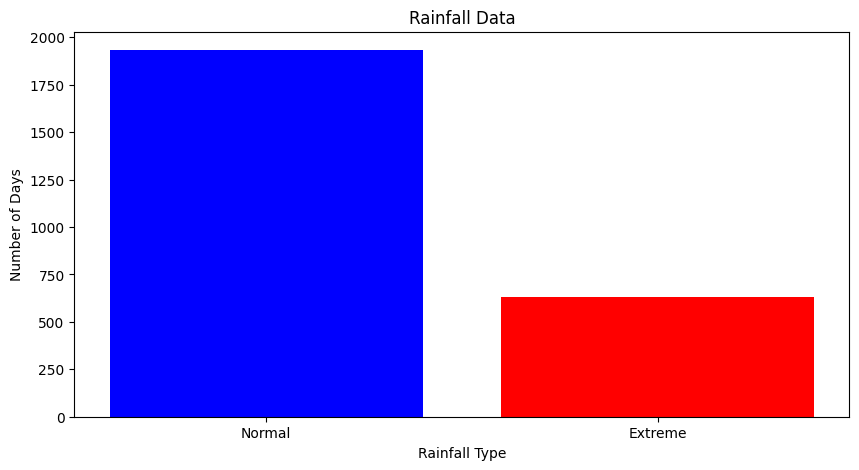

Epoch 1/100
49/49 [==============================] - 0s 4ms/step - loss: 0.4380 - val_loss: 0.4040
Epoch 2/100
49/49 [==============================] - 0s 1ms/step - loss: 0.3196 - val_loss: 0.2979
Epoch 3/100
49/49 [==============================] - 0s 1ms/step - loss: 0.2193 - val_loss: 0.2023
Epoch 4/100
49/49 [==============================] - 0s 1ms/step - loss: 0.1347 - val_loss: 0.1263
Epoch 5/100
49/49 [==============================] - 0s 1ms/step - loss: 0.0747 - val_loss: 0.0761
Epoch 6/100
49/49 [==============================] - 0s 1ms/step - loss: 0.0417 - val_loss: 0.0485
Epoch 7/100
49/49 [==============================] - 0s 1ms/step - loss: 0.0252 - val_loss: 0.0322
Epoch 8/100
49/49 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 0.0227
Epoch 9/100
49/49 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0177
Epoch 10/100
49/49 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0150
Epoch 11/

Epoch 81/100
49/49 [==============================] - 0s 1ms/step - loss: 3.4638e-04 - val_loss: 4.9964e-04
Epoch 82/100
49/49 [==============================] - 0s 1ms/step - loss: 3.4201e-04 - val_loss: 4.8410e-04
Epoch 83/100
49/49 [==============================] - 0s 1ms/step - loss: 3.3365e-04 - val_loss: 4.4763e-04
Epoch 84/100
49/49 [==============================] - 0s 1ms/step - loss: 3.1333e-04 - val_loss: 4.4447e-04
Epoch 85/100
49/49 [==============================] - 0s 1ms/step - loss: 3.0589e-04 - val_loss: 4.0222e-04
Epoch 86/100
49/49 [==============================] - 0s 1ms/step - loss: 2.9795e-04 - val_loss: 4.0530e-04
Epoch 87/100
49/49 [==============================] - 0s 1ms/step - loss: 2.8611e-04 - val_loss: 3.9939e-04
Epoch 88/100
49/49 [==============================] - 0s 1ms/step - loss: 2.7721e-04 - val_loss: 3.7283e-04
Epoch 89/100
49/49 [==============================] - 0s 1ms/step - loss: 2.7617e-04 - val_loss: 3.5883e-04
Epoch 90/100
49/49 [========

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 11.0]
extreme_data = data[data['rainfall'] > 11.0]

# Plot the normal and extreme rainfall data
plt.figure(figsize=(10, 5))
plt.bar('Normal', len(normal_data), color='blue')
plt.bar('Extreme', len(extreme_data), color='red')
plt.title('Rainfall Data')
plt.xlabel('Rainfall Type')
plt.ylabel('Number of Days')
plt.show()

# Normalize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(normal_data[['windspeed', 'tpw', 'rainfall']].values)

# Define the autoencoder architecture
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu')(input_layer)
decoded = Dense(3, activation=None)(encoded)

# Create the autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='logcosh')

# Train the model
history = autoencoder.fit(train_data, train_data, epochs=100, batch_size=32, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = scaler.transform(data[['windspeed', 'tpw', 'rainfall']].values)
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 8.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 11.0, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))

# Reverse the standardization of the predicted rainfall values and save the results to a new CSV file
predicted_rainfall = scaler.inverse_transform(predicted_data)[:, 2]
data['predicted_rainfall'] = predicted_rainfall
data.to_csv('predicted_rainfall_data.csv', index=False)


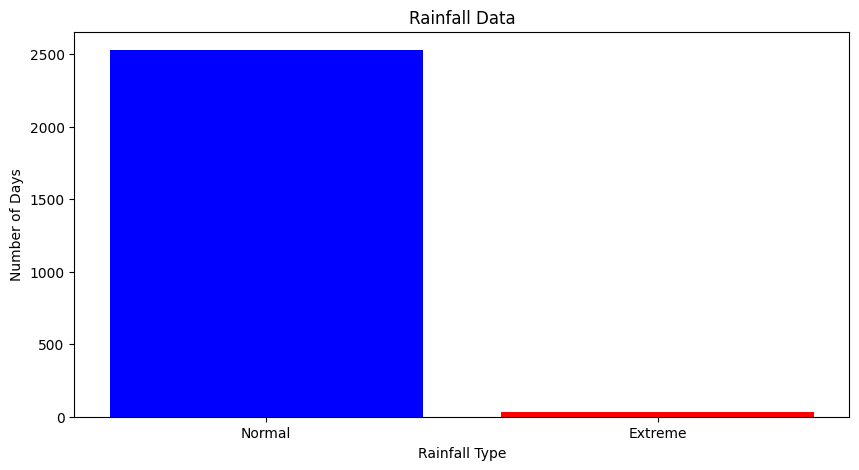

Epoch 1/100
64/64 [==============================] - 0s 3ms/step - loss: 7.9130 - val_loss: 6.3296
Epoch 2/100
64/64 [==============================] - 0s 1ms/step - loss: 4.7577 - val_loss: 2.9758
Epoch 3/100
64/64 [==============================] - 0s 1ms/step - loss: 1.6140 - val_loss: 0.7972
Epoch 4/100
64/64 [==============================] - 0s 1ms/step - loss: 0.4633 - val_loss: 0.3091
Epoch 5/100
64/64 [==============================] - 0s 1ms/step - loss: 0.1598 - val_loss: 0.1170
Epoch 6/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0714 - val_loss: 0.0657
Epoch 7/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0452 - val_loss: 0.0437
Epoch 8/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0332 - val_loss: 0.0317
Epoch 9/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0261 - val_loss: 0.0248
Epoch 10/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0215 - val_loss: 0.0201
Epoch 11/

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 30]
extreme_data = data[data['rainfall'] > 30]

# Plot the normal and extreme rainfall data
plt.figure(figsize=(10, 5))
plt.bar('Normal', len(normal_data), color='blue')
plt.bar('Extreme', len(extreme_data), color='red')
plt.title('Rainfall Data')
plt.xlabel('Rainfall Type')
plt.ylabel('Number of Days')
plt.show()

# Define the autoencoder architecture
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu')(input_layer)
decoded = Dense(3, activation=None)(encoded)

# Create the autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='logcosh')

# Train the model
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
history = autoencoder.fit(train_data, train_data, epochs=100, batch_size=32, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[['windspeed', 'tpw', 'rainfall']].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 30, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))


In [18]:
data

,date,windspeed,tpw,rainfall,predicted_rainfall,error,rainfall_class,actual_rainfall_class
0,6/1/2000,12.245595,0.033285,4.688589,4.689952,0.001364,Normal,Normal
1,6/2/2000,12.825491,0.044874,11.330589,11.333991,0.003402,Normal,Normal
2,6/3/2000,12.921664,0.010243,6.894713,6.897418,0.002705,Normal,Normal
3,6/4/2000,15.149001,0.036881,4.613324,4.614687,0.001363,Normal,Normal
4,6/5/2000,18.495907,0.139491,8.111635,8.113751,0.002116,Normal,Normal
...,...,...,...,...,...,...,...,...
2557,9/26/2020,5.577215,0.009963,4.467977,4.469275,0.001298,Normal,Normal
2558,9/27/2020,5.184293,0.002341,1.572182,1.572849,0.000668,Normal,Normal
2559,9/28/2020,4.469007,0.000867,1.819019,1.819735,0.000716,Normal,Normal
2560,9/29/2020,4.259090,0.001416,2.198017,2.198763,0.000746,Normal,Normal


In [143]:
wrong_predictions = data[data['rainfall_class'] != data['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

           date  windspeed       tpw   rainfall  predicted_rainfall     error  \
41    7/12/2000  23.003010  0.016358  33.846075           33.845470  0.000604   
552    8/4/2004  21.769238  0.043448  44.404364           44.383682  0.020682   
876   6/23/2007  23.908970  0.331606  49.356381           49.326328  0.030053   
900   7/17/2007  19.211468  0.030241  32.941690           32.941795  0.000106   
920    8/6/2007  17.366877  0.022628  31.609187           31.609510  0.000323   
1033  7/28/2008  20.585272  0.014900  32.559895           32.559639  0.000256   
1143  7/16/2009  21.342918  0.037500  38.754120           38.754650  0.000530   
1144  7/17/2009  21.451813  0.105873  39.511546           39.512154  0.000608   
1145  7/18/2009  16.981620  0.104322  38.342482           38.319210  0.023272   
1343   6/2/2011  12.654827  0.550524  34.993438           34.963329  0.030108   
1388  7/17/2011  19.214113  0.057870  45.056388           45.029278  0.027110   
1409   8/7/2011  15.895408  

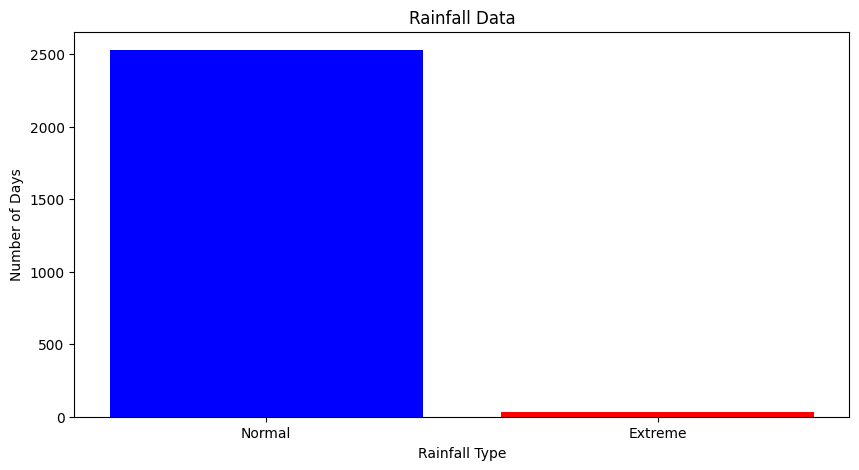

Epoch 1/100
64/64 [==============================] - 1s 9ms/step - loss: 6.3474 - val_loss: 4.8926
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 3.4545 - val_loss: 2.0922
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.9704 - val_loss: 0.5840
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.3808 - val_loss: 0.3199
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.1909 - val_loss: 0.1512
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0921 - val_loss: 0.0874
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0675 - val_loss: 0.0743
Epoch 8/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0621 - val_loss: 0.0688
Epoch 9/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0587 - val_loss: 0.0646
Epoch 10/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0559 - val_loss: 0.0615
Epoch 11/

64/64 [==============================] - 0s 3ms/step - loss: 0.0210 - val_loss: 0.0212
Epoch 84/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0208 - val_loss: 0.0209
Epoch 85/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.0206
Epoch 86/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0203 - val_loss: 0.0204
Epoch 87/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0201 - val_loss: 0.0202
Epoch 88/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0198 - val_loss: 0.0199
Epoch 89/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.0197
Epoch 90/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.0194
Epoch 91/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.0192
Epoch 92/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0189
Epoch 93/100


In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 30]
extreme_data = data[data['rainfall'] > 30]

# Plot the normal and extreme rainfall data
plt.figure(figsize=(10, 5))
plt.bar('Normal', len(normal_data), color='blue')
plt.bar('Extreme', len(extreme_data), color='red')
plt.title('Rainfall Data')
plt.xlabel('Rainfall Type')
plt.ylabel('Number of Days')
plt.show()

# Define the autoencoder architecture with regularization
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', activity_regularizer=regularizers.l1(0.001))(input_layer)
decoded = Dense(3, activation=None)(encoded)

# Create the autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='logcosh')

# Train the model
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
history = autoencoder.fit(train_data, train_data, epochs=100, batch_size=32, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[['windspeed', 'tpw', 'rainfall']].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 30, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))


In [146]:
data

,date,windspeed,tpw,rainfall,predicted_rainfall,error,rainfall_class,actual_rainfall_class
0,6/1/2000,12.245595,0.033285,4.688589,4.685352,0.003236,Normal,Normal
1,6/2/2000,12.825491,0.044874,11.330589,11.320268,0.010322,Normal,Normal
2,6/3/2000,12.921664,0.010243,6.894713,6.889604,0.005110,Normal,Normal
3,6/4/2000,15.149001,0.036881,4.613324,4.612628,0.000697,Normal,Normal
4,6/5/2000,18.495907,0.139491,8.111635,8.109536,0.002099,Normal,Normal
...,...,...,...,...,...,...,...,...
2557,9/26/2020,5.577215,0.009963,4.467977,4.459395,0.008581,Normal,Normal
2558,9/27/2020,5.184293,0.002341,1.572182,1.566577,0.005604,Normal,Normal
2559,9/28/2020,4.469007,0.000867,1.819019,1.812531,0.006488,Normal,Normal
2560,9/29/2020,4.259090,0.001416,2.198017,2.190919,0.007098,Normal,Normal


In [147]:
wrong_predictions = data[data['rainfall_class'] != data['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

           date  windspeed       tpw   rainfall  predicted_rainfall     error  \
41    7/12/2000  23.003010  0.016358  33.846075           33.803745  0.042330   
552    8/4/2004  21.769238  0.043448  44.404364           44.360970  0.043394   
876   6/23/2007  23.908970  0.331606  49.356381           49.333420  0.022962   
900   7/17/2007  19.211468  0.030241  32.941690           32.905117  0.036573   
920    8/6/2007  17.366877  0.022628  31.609187           31.574574  0.034614   
1033  7/28/2008  20.585272  0.014900  32.559895           32.520660  0.039235   
1143  7/16/2009  21.342918  0.037500  38.754120           38.713226  0.040894   
1144  7/17/2009  21.451813  0.105873  39.511546           39.476124  0.035422   
1145  7/18/2009  16.981620  0.104322  38.342482           38.312340  0.030143   
1343   6/2/2011  12.654827  0.550524  34.993438           35.008255  0.014817   
1388  7/17/2011  19.214113  0.057870  45.056388           45.016743  0.039645   
1409   8/7/2011  15.895408  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 30]
extreme_data = data[data['rainfall'] > 30]

# Define the autoencoder architecture with the best regularization strength found by grid search
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2', activity_regularizer='l2', kernel_initializer='he_uniform')(input_layer)
decoded = Dense(3, activation=None, kernel_initializer='he_uniform')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='logcosh')

# Train the model
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
history = autoencoder.fit(train_data, train_data, epochs=100, batch_size=32, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[['windspeed', 'tpw', 'rainfall']].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 30, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))


In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 30]
extreme_data = data[data['rainfall'] > 30]

# Define the autoencoder architecture
def create_model(reg_strength):
    input_layer = Input(shape=(3,))
    encoded = Dense(16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2', activity_regularizer='l2', kernel_initializer='he_uniform')(input_layer)
    decoded = Dense(3, activation=None, kernel_initializer='he_uniform')(encoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='logcosh', metrics=['mse'])
    return autoencoder

# Create the KerasRegressor
keras_reg = KerasRegressor(build_fn=create_model)

# Define the grid search parameters
reg_strengths = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(reg_strength=reg_strengths)

# Perform the grid search
grid = GridSearchCV(estimator=keras_reg, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(normal_data[['windspeed', 'tpw', 'rainfall']].values, normal_data[['windspeed', 'tpw', 'rainfall']].values)

# Print the best regularization strength found
print("Best reg_strength: {:.3f} using {}".format(grid_result.best_params_['reg_strength'], grid_result.best_params_))

# Define the autoencoder architecture with the best regularization strength found by grid search
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2', activity_regularizer='l2', kernel_initializer='he_uniform')(input_layer)
decoded = Dense(3, activation=None, kernel_initializer='he_uniform')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='logcosh')

# Train the model
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
history = autoencoder.fit(train_data, train_data, epochs=100, batch_size=32, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[['windspeed', 'tpw', 'rainfall']].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 30, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))



C:\Users\shine\AppData\Local\Temp\ipykernel_25120\2823681750.py:26: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=create_model)


80/80 [==============================] - 1s 3ms/step - loss: 6.7714 - mse: 37.0081
Best reg_strength: 100.000 using {'reg_strength': 100}
Epoch 1/100
64/64 [==============================] - 2s 9ms/step - loss: 24.2573 - val_loss: 20.7919
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 17.9178 - val_loss: 15.3913
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 13.3975 - val_loss: 11.7155
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 10.1581 - val_loss: 8.8651
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 7.7945 - val_loss: 7.0431
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 6.3053 - val_loss: 5.8035
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 5.2292 - val_loss: 4.8605
Epoch 8/100
64/64 [==============================] - 0s 3ms/step - loss: 4.3881 - val_loss: 4.1164
Epoch 9/100
64/64 [==============================] - 0s 3ms/ste

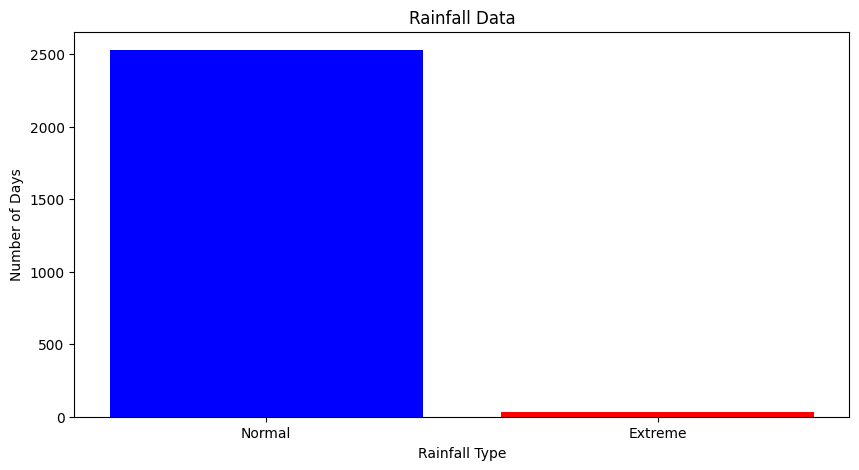

C:\Users\shine\AppData\Local\Temp\ipykernel_25120\3824242652.py:34: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best: -5.645572 using {'reg_strength': 10}
Best regularization strength: 10.000000


In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 30]
extreme_data = data[data['rainfall'] > 30]

# Plot the normal and extreme rainfall data
plt.figure(figsize=(10, 5))
plt.bar('Normal', len(normal_data), color='blue')
plt.bar('Extreme', len(extreme_data), color='red')
plt.title('Rainfall Data')
plt.xlabel('Rainfall Type')
plt.ylabel('Number of Days')
plt.show()

# Define the autoencoder architecture
def create_model(reg_strength):
    input_layer = Input(shape=(3,))
    encoded = Dense(16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2', activity_regularizer='l2', kernel_constraint='max_norm', bias_constraint='max_norm')(input_layer)
    decoded = Dense(3, activation=None)(encoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='logcosh')
    return autoencoder

model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid search parameters
reg_strengths = [0.01, 0.1, 1, 10]
param_grid = dict(reg_strength=reg_strengths)

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(normal_data[['windspeed', 'tpw', 'rainfall']].values, normal_data[['windspeed', 'tpw', 'rainfall']].values)

# Print the best results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
best_reg_strength = grid_result.best_params_['reg_strength']
print("Best regularization strength: %f" % (best_reg_strength))


In [9]:


# Define the autoencoder architecture with the best regularization strength
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(best_reg_strength))(input_layer)
decoded = Dense(3, activation=None)(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='logcosh')
history = autoencoder.fit(train_data, train_data, epochs=100, batch_size=32, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[['windspeed', 'tpw', 'rainfall']].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 30, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))


NameError: name 'regularizers' is not defined

In [152]:
data

,date,windspeed,tpw,rainfall,predicted_rainfall,error,rainfall_class,actual_rainfall_class
0,6/1/2000,12.245595,0.033285,4.688589,4.757562,0.068973,Normal,Normal
1,6/2/2000,12.825491,0.044874,11.330589,11.277840,0.052750,Normal,Normal
2,6/3/2000,12.921664,0.010243,6.894713,6.926691,0.031977,Normal,Normal
3,6/4/2000,15.149001,0.036881,4.613324,4.704754,0.091430,Normal,Normal
4,6/5/2000,18.495907,0.139491,8.111635,8.161212,0.049577,Normal,Normal
...,...,...,...,...,...,...,...,...
2557,9/26/2020,5.577215,0.009963,4.467977,4.492797,0.024821,Normal,Normal
2558,9/27/2020,5.184293,0.002341,1.572182,1.649051,0.076869,Normal,Normal
2559,9/28/2020,4.469007,0.000867,1.819019,1.886024,0.067005,Normal,Normal
2560,9/29/2020,4.259090,0.001416,2.198017,2.256318,0.058301,Normal,Normal


In [153]:
wrong_predictions = data[data['rainfall_class'] != data['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

           date  windspeed       tpw   rainfall  predicted_rainfall     error  \
41    7/12/2000  23.003010  0.016358  33.846075           33.439987  0.406088   
552    8/4/2004  21.769238  0.043448  44.404364           41.227684  3.176680   
876   6/23/2007  23.908970  0.331606  49.356381           44.983994  4.372388   
900   7/17/2007  19.211468  0.030241  32.941690           32.505436  0.436254   
920    8/6/2007  17.366877  0.022628  31.609187           31.194632  0.414556   
1033  7/28/2008  20.585272  0.014900  32.559895           32.160690  0.399205   
1143  7/16/2009  21.342918  0.037500  38.754120           37.393295  1.360825   
1144  7/17/2009  21.451813  0.105873  39.511546           37.919037  1.592509   
1145  7/18/2009  16.981620  0.104322  38.342482           36.145439  2.197043   
1343   6/2/2011  12.654827  0.550524  34.993438           32.962402  2.031035   
1388  7/17/2011  19.214113  0.057870  45.056388           41.087616  3.968772   
1409   8/7/2011  15.895408  

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from keras import backend as K

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 30]
extreme_data = data[data['rainfall'] > 30]

# Define the weight for the extreme cases
extreme_weight = len(normal_data) / len(extreme_data)

# Define a function to calculate the weighted loss
def weighted_loss(extreme_weight):
    def loss(y_true, y_pred):
        normal_loss = K.mean(K.square(y_true - y_pred))
        extreme_loss = K.mean(K.square(y_true - y_pred)) * extreme_weight
        return tf.where(y_true > 30, extreme_loss, normal_loss)
    return loss


# Define a function to find the best regularization strength
def find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size):
    best_reg_strength = None
    best_loss = float('inf')
    for reg_strength in reg_strengths:
        # Define the autoencoder architecture
        input_layer = Input(shape=(3,))
        encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=reg_strength))(input_layer)
        decoded = Dense(3, activation=None)(encoded)

        # Create the autoencoder
        autoencoder = Model(input_layer, decoded)

        # Compile the autoencoder with the weighted loss function
        autoencoder.compile(optimizer='adam', loss=weighted_loss(extreme_weight))

        # Train the model
        history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

        # Calculate the validation loss
        val_loss = np.mean(history.history['val_loss'])

        # Update the best regularization strength and loss
        if val_loss < best_loss:
            best_reg_strength = reg_strength
            best_loss = val_loss

    print('Best regularization strength:', best_reg_strength)
    return best_reg_strength

# Find the best regularization strength
reg_strengths = [0.01, 0.1, 1, 10]
num_epochs = 100
batch_size = 32
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
best_reg_strength = find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size)

# Define the autoencoder architecture with the best regularization strength
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
decoded = Dense(3, activation=None)(encoded)

# Create the autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder with the weighted loss function
autoencoder.compile(optimizer='adam', loss=weighted_loss(extreme_weight))

# Train the model with the majority class
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[['windspeed', 'tpw', 'rainfall']].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 30, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))


Best regularization strength: 0.01
Epoch 1/100
64/64 [==============================] - 1s 7ms/step - loss: 81.8210 - val_loss: 63.9346
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 46.0786 - val_loss: 29.9775
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 17.6711 - val_loss: 8.8465
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 4.4824 - val_loss: 2.7178
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 1.6524 - val_loss: 1.5855
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.9964 - val_loss: 1.0073
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 0.6122 - val_loss: 0.6118
Epoch 8/100
64/64 [==============================] - 0s 3ms/step - loss: 0.3451 - val_loss: 0.3218
Epoch 9/100
64/64 [==============================] - 0s 3ms/step - loss: 0.1770 - val_loss: 0.1867
Epoch 10/100
64/64 [==============================] - 0s 3ms/step - l

In [156]:
wrong_predictions = data[data['rainfall_class'] != data['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

           date  windspeed       tpw   rainfall  predicted_rainfall     error  \
41    7/12/2000  23.003010  0.016358  33.846075           33.856327  0.010252   
552    8/4/2004  21.769238  0.043448  44.404364           44.422832  0.018468   
876   6/23/2007  23.908970  0.331606  49.356381           49.369034  0.012652   
900   7/17/2007  19.211468  0.030241  32.941690           32.955303  0.013613   
920    8/6/2007  17.366877  0.022628  31.609187           31.623812  0.014624   
1033  7/28/2008  20.585272  0.014900  32.559895           32.571793  0.011897   
1143  7/16/2009  21.342918  0.037500  38.754120           38.769569  0.015449   
1144  7/17/2009  21.451813  0.105873  39.511546           39.527405  0.015859   
1145  7/18/2009  16.981620  0.104322  38.342482           38.322002  0.020480   
1343   6/2/2011  12.654827  0.550524  34.993438           34.915676  0.077761   
1388  7/17/2011  19.214113  0.057870  45.056388           45.013912  0.042476   
1409   8/7/2011  15.895408  

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from keras import backend as K

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 50]
extreme_data = data[data['rainfall'] > 50]

def weighted_loss(normal_weight=0.005, extreme_weight=0.001):
    def loss(y_true, y_pred):
        normal_loss = K.mean(K.square(y_true - y_pred))
        extreme_loss = K.mean(K.square(y_true - y_pred) * K.cast(y_true > 50, 'float32'))
        return K.mean(normal_weight * normal_loss + extreme_weight * extreme_loss)
    return loss

# Define a function to find the best regularization strength
def find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size):
    best_reg_strength = None
    best_loss = float('inf')
    for reg_strength in reg_strengths:
        # Define the autoencoder architecture
        input_layer = Input(shape=(3,))
        encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=reg_strength))(input_layer)
        decoded = Dense(3, activation=None)(encoded)

        # Create the autoencoder
        autoencoder = Model(input_layer, decoded)

        # Compile the autoencoder with the weighted loss function
        autoencoder.compile(optimizer='adam', loss=weighted_loss(normal_weight, extreme_weight))

        # Train the model
        history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

        # Calculate the validation loss
        val_loss = np.mean(history.history['val_loss'])

        # Update the best regularization strength and loss
        if val_loss < best_loss:
            best_reg_strength = reg_strength
            best_loss = val_loss

    print('Best regularization strength:', best_reg_strength)
    return best_reg_strength

# Find the best regularization strength
reg_strengths = [0.01, 0.1, 1, 10]
num_epochs = 100
batch_size = 32
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
best_reg_strength = find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size)

# Define the autoencoder architecture with the best regularization strength
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
decoded = Dense(3, activation=None)(encoded)

# Create the autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder with the weighted loss function
autoencoder.compile(optimizer='adam', loss=weighted_loss())

# Train the model with the majority class
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[['windspeed', 'tpw', 'rainfall']].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 50, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))


Best regularization strength: 0.1
Epoch 1/100
64/64 [==============================] - 0s 3ms/step - loss: 0.6782 - val_loss: 0.5597
Epoch 2/100
64/64 [==============================] - 0s 1ms/step - loss: 0.4458 - val_loss: 0.3687
Epoch 3/100
64/64 [==============================] - 0s 1ms/step - loss: 0.3007 - val_loss: 0.2602
Epoch 4/100
64/64 [==============================] - 0s 1ms/step - loss: 0.2167 - val_loss: 0.1948
Epoch 5/100
64/64 [==============================] - 0s 1ms/step - loss: 0.1636 - val_loss: 0.1512
Epoch 6/100
64/64 [==============================] - 0s 1ms/step - loss: 0.1275 - val_loss: 0.1212
Epoch 7/100
64/64 [==============================] - 0s 1ms/step - loss: 0.1025 - val_loss: 0.1000
Epoch 8/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0830 - val_loss: 0.0804
Epoch 9/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0676 - val_loss: 0.0668
Epoch 10/100
64/64 [==============================] - 0s 1ms/step - loss: 0

In [77]:
wrong_predictions = data[data['rainfall_class'] != data['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

           date  windspeed       tpw   rainfall  predicted_rainfall     error  \
2387   8/9/2019  21.575483  0.042829  80.636074           71.615608  9.020466   
2388  8/10/2019  20.276800  0.043114  58.431061           54.596336  3.834725   

     rainfall_class actual_rainfall_class  
2387         Normal               Extreme  
2388         Normal               Extreme  


In [58]:
extreme_data

,date,windspeed,tpw,rainfall
2387,8/9/2019,21.575483,0.042829,80.636074
2388,8/10/2019,20.276800,0.043114,58.431061


In [63]:
data[data["error"]>9]

,date,windspeed,tpw,rainfall,predicted_rainfall,error,rainfall_class,actual_rainfall_class
876,6/23/2007,23.908970,0.331606,49.356381,40.345200,9.011182,Normal,Normal
1388,7/17/2011,19.214113,0.057870,45.056388,36.048218,9.008170,Normal,Normal
1481,6/18/2012,16.490360,0.060908,47.977786,37.389614,10.588171,Extreme,Normal
2387,8/9/2019,21.575483,0.042829,80.636074,61.865894,18.770180,Extreme,Extreme
2388,8/10/2019,20.276800,0.043114,58.431061,45.799969,12.631092,Extreme,Extreme


In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from keras import backend as K

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 50]
extreme_data = data[data['rainfall'] > 50]

def custom_loss(y_true, y_pred):
    normal_loss = K.mean(K.square(y_true[y_true < 50.0] - y_pred[y_true < 50.0]))
    extreme_loss = K.mean(K.square(y_true[y_true >= 50.0] - y_pred[y_true >= 50.0]))
    return 1* normal_loss + 0 * extreme_loss


# Define a function to find the best regularization strength
def find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size):
    best_reg_strength = None
    best_loss = float('inf')
    for reg_strength in reg_strengths:
        # Define the autoencoder architecture
        input_layer = Input(shape=(3,))
        encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=reg_strength))(input_layer)
        decoded = Dense(3, activation=None)(encoded)

        # Create the autoencoder
        autoencoder = Model(input_layer, decoded)

        # Compile the autoencoder with the weighted loss function
        autoencoder.compile(optimizer='adam', loss=weighted_loss(normal_weight, extreme_weight))

        # Train the model
        history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

        # Calculate the validation loss
        val_loss = np.mean(history.history['val_loss'])

        # Update the best regularization strength and loss
        if val_loss < best_loss:
            best_reg_strength = reg_strength
            best_loss = val_loss

    print('Best regularization strength:', best_reg_strength)
    return best_reg_strength

# Find the best regularization strength
reg_strengths = [0.01, 0.1, 1, 10]
num_epochs = 100
batch_size = 32
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
best_reg_strength = find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size)

# Define the autoencoder architecture with the best regularization strength
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
decoded = Dense(3, activation=None)(encoded)

# Create the autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder with the weighted loss function
autoencoder.compile(optimizer='adam', loss=custom_loss)

# Train the model with the majority class
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[['windspeed', 'tpw', 'rainfall']].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 50, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))


Best regularization strength: 0.01
Epoch 1/100
64/64 [==============================] - 1s 4ms/step - loss: 138.4827 - val_loss: 119.9598
Epoch 2/100
64/64 [==============================] - 0s 1ms/step - loss: 84.3867 - val_loss: 70.2653
Epoch 3/100
64/64 [==============================] - 0s 1ms/step - loss: 44.6393 - val_loss: 34.2881
Epoch 4/100
64/64 [==============================] - 0s 1ms/step - loss: 19.4167 - val_loss: 14.4217
Epoch 5/100
64/64 [==============================] - 0s 1ms/step - loss: 7.8106 - val_loss: 6.4292
Epoch 6/100
64/64 [==============================] - 0s 1ms/step - loss: 3.6706 - val_loss: 3.4647
Epoch 7/100
64/64 [==============================] - 0s 1ms/step - loss: 2.1032 - val_loss: 2.0539
Epoch 8/100
64/64 [==============================] - 0s 1ms/step - loss: 1.2791 - val_loss: 1.2350
Epoch 9/100
64/64 [==============================] - 0s 1ms/step - loss: 0.7795 - val_loss: 0.7691
Epoch 10/100
64/64 [==============================] - 0s 1ms/ste

In [50]:
wrong_predictions = data[data['rainfall_class'] != data['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

Empty DataFrame
Columns: [date, windspeed, tpw, rainfall, predicted_rainfall, error, rainfall_class, actual_rainfall_class]
Index: []


In [189]:
extreme_data

,date,windspeed,tpw,rainfall
2387,8/9/2019,21.575483,0.042829,80.636074
2388,8/10/2019,20.276800,0.043114,58.431061


In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from keras import backend as K

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 30]
extreme_data = data[data['rainfall'] > 30]

def weighted_loss(normal_weight=0.001, extreme_weight=9):
    def loss(y_true, y_pred):
        normal_loss = K.mean(K.square(y_true - y_pred))
        extreme_loss = K.mean(K.square(y_true - y_pred) * K.cast(y_true > 30, 'float32'))
        return K.mean(normal_weight * normal_loss + extreme_weight * extreme_loss)
    return loss

# Define a function to find the best combo of normal_weight and extreme_weight based on the error threshold
def find_best_weights(train_data, normal_weights, extreme_weights, num_epochs, batch_size, threshold):
    best_combo = None
    best_accuracy = 0
    for normal_weight in normal_weights:
        for extreme_weight in extreme_weights:
            # Define the autoencoder architecture with the given weights
            input_layer = Input(shape=(3,))
            encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
            decoded = Dense(3, activation=None)(encoded)
            autoencoder = Model(input_layer, decoded)
            autoencoder.compile(optimizer='adam', loss=weighted_loss(normal_weight, extreme_weight))

            # Train the model with the majority class
            train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
            autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

            # Use the trained autoencoder to predict the rainfall values for all data points
            test_data = data[['windspeed', 'tpw', 'rainfall']].values
            predicted_data = autoencoder.predict(test_data)
            data['predicted_rainfall'] = predicted_data[:, 2]

            # Calculate the error between the predicted and actual rainfall values
            data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

            # Classify the rainfall data into normal and extreme based on the error threshold
            data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

            # Define the actual rainfall class based on the threshold of 11
            data['actual_rainfall_class'] = np.where(data['rainfall'] > 30, 'Extreme', 'Normal')

            # Calculate the accuracy
            num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
            num_total = len(data)
            accuracy = num_correct / num_total * 100

            # Update the best combo of weights and accuracy
            if accuracy > best_accuracy:
                best_combo = (normal_weight, extreme_weight)
                best_accuracy = accuracy

    print('Best combo of weights:', best_combo)
    return best_combo

# Find the best regularization strength
reg_strengths = [0.01, 0.1, 1, 10]
num_epochs = 100
batch_size = 32
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
best_reg_strength = find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size)

# Define the autoencoder architecture with the best regularization strength
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
decoded = Dense(3, activation=None)(encoded)

# Create the autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder with the weighted loss function
autoencoder.compile(optimizer='adam', loss=weighted_loss())

# Train the model with the majority class
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[['windspeed', 'tpw', 'rainfall']].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 30, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))


Best regularization strength: 0.01
Epoch 1/100
64/64 [==============================] - 1s 3ms/step - loss: 0.0915 - val_loss: 0.0676
Epoch 2/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0543 - val_loss: 0.0463
Epoch 3/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0394 - val_loss: 0.0354
Epoch 4/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0304 - val_loss: 0.0276
Epoch 5/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0238 - val_loss: 0.0217
Epoch 6/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.0174
Epoch 7/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0141
Epoch 8/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0115
Epoch 9/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 10/100
64/64 [==============================] - 0s 1ms/step - loss: 

In [246]:
wrong_predictions = data[data['rainfall_class'] != data['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

           date  windspeed       tpw   rainfall  predicted_rainfall     error  \
41    7/12/2000  23.003010  0.016358  33.846075           33.278931  0.567144   
552    8/4/2004  21.769238  0.043448  44.404364           42.520748  1.883616   
876   6/23/2007  23.908970  0.331606  49.356381           46.652267  2.704114   
900   7/17/2007  19.211468  0.030241  32.941690           32.378540  0.563150   
920    8/6/2007  17.366877  0.022628  31.609187           31.090982  0.518205   
1033  7/28/2008  20.585272  0.014900  32.559895           32.029484  0.530411   
1143  7/16/2009  21.342918  0.037500  38.754120           37.848267  0.905854   
1144  7/17/2009  21.451813  0.105873  39.511546           38.501362  1.010184   
1145  7/18/2009  16.981620  0.104322  38.342482           37.374252  0.968230   
1343   6/2/2011  12.654827  0.550524  34.993438           34.264565  0.728873   
1388  7/17/2011  19.214113  0.057870  45.056388           42.946659  2.109729   
1409   8/7/2011  15.895408  

In [247]:
extreme_data

,date,windspeed,tpw,rainfall
41,7/12/2000,23.003010,0.016358,33.846075
552,8/4/2004,21.769238,0.043448,44.404364
876,6/23/2007,23.908970,0.331606,49.356381
900,7/17/2007,19.211468,0.030241,32.941690
920,8/6/2007,17.366877,0.022628,31.609187
1033,7/28/2008,20.585272,0.014900,32.559895
1143,7/16/2009,21.342918,0.037500,38.754120
1144,7/17/2009,21.451813,0.105873,39.511546
1145,7/18/2009,16.981620,0.104322,38.342482
1343,6/2/2011,12.654827,0.550524,34.993438


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from keras import backend as K

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 30]
extreme_data = data[data['rainfall'] > 30]

# Define a function to calculate the error threshold
def calculate_error_threshold(data):
    normal_errors = np.abs(data[data['rainfall'] <= 30]['predicted_rainfall'] - data[data['rainfall'] <= 30]['rainfall'])
    extreme_errors = np.abs(data[data['rainfall'] > 30]['predicted_rainfall'] - data[data['rainfall'] > 30]['rainfall'])
    return np.mean(normal_errors) + 2 * np.std(normal_errors), np.mean(extreme_errors)

# Define a function to calculate the accuracy
def calculate_accuracy(data, threshold):
    data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')
    data['actual_rainfall_class'] = np.where(data['rainfall'] > 30, 'Extreme', 'Normal')
    num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
    num_total = len(data)
    return num_correct / num_total * 100

def weighted_loss(normal_weight=0.001, extreme_weight=9):
    def loss(y_true, y_pred):
        normal_loss = K.mean(K.square(y_true - y_pred))
        extreme_loss = K.mean(K.square(y_true - y_pred) * K.cast(y_true > 30, 'float32'))
        return K.mean(normal_weight * normal_loss + extreme_weight * extreme_loss)
    return loss

# Define a function to find the best weights for normal and extreme data
def find_best_weights(train_data, normal_weights, extreme_weights, num_epochs, batch_size):
    best_weights = None
    best_accuracy = 0
    for normal_weight in normal_weights:
        for extreme_weight in extreme_weights:
            # Define the autoencoder architecture
            input_layer = Input(shape=(3,))
            encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
            decoded = Dense(3, activation=None)(encoded)

            # Create the autoencoder
            autoencoder = Model(input_layer, decoded)

            # Compile the autoencoder with the weighted loss function
            autoencoder.compile(optimizer='adam', loss=weighted_loss(normal_weight, extreme_weight))

            # Train the model
            history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

            # Use the trained autoencoder to predict the rainfall values for all data points
            test_data = data[['windspeed', 'tpw', 'rainfall']].values
            predicted_data = autoencoder.predict(test_data)
            data['predicted_rainfall'] = predicted_data[:, 2]

            # Calculate the error between the predicted and actual rainfall values
            data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

            # Calculate the accuracy
            threshold_normal, threshold_extreme = calculate_error_threshold(data)
            threshold = (threshold_normal + threshold_extreme) / 2
            accuracy = calculate_accuracy(data, threshold)

            # Update the best weights and accuracy
            if accuracy > best_accuracy:
                best_normal_weight = normal_weight
                best_extreme_weight = extreme_weight
                best_accuracy = accuracy

    print('Best normal_weight:', best_normal_weight)
    print('Best extreme_weight:', best_extreme_weight)
    print('Accuracy: {:.2f}%'.format(best_accuracy))
def find_best_combo(data, normal_weight_range, extreme_weight_range, threshold):
    best_error = float('inf')
    best_combo = None
    
    for normal_weight in normal_weight_range:
        for extreme_weight in extreme_weight_range:
            combo_error = 0
            for x, y in data:
                if y == 0:
                    error = abs(normal_weight * x - y)
                else:
                    error = abs(extreme_weight * x - y)
                
                if error > threshold:
                    combo_error += error
            if combo_error < best_error:
                best_error = combo_error
                best_combo = (normal_weight, extreme_weight)
                
    return best_combo


In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from keras import backend as K

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 50]
extreme_data = data[data['rainfall'] > 50]

def weighted_loss(normal_weight=1, extreme_weight=0.001):
    def loss(y_true, y_pred):
        normal_loss = K.mean(K.square(y_true - y_pred))
        extreme_loss = K.mean(K.square(y_true - y_pred) * K.cast(y_true > 50, 'float32'))
        return K.mean(normal_weight * normal_loss + extreme_weight * extreme_loss)
    return loss

# Define a function to find the best regularization strength
def find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size):
    best_reg_strength = None
    best_loss = float('inf')
    for reg_strength in reg_strengths:
        # Define the autoencoder architecture
        input_layer = Input(shape=(3,))
        encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=reg_strength))(input_layer)
        decoded = Dense(3, activation=None)(encoded)

        # Create the autoencoder
        autoencoder = Model(input_layer, decoded)

        # Compile the autoencoder with the weighted loss function
        autoencoder.compile(optimizer='adam', loss=weighted_loss(normal_weight, extreme_weight))

        # Train the model
        history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

        # Calculate the validation loss
        val_loss = np.mean(history.history['val_loss'])

        # Update the best regularization strength and loss
        if val_loss < best_loss:
            best_reg_strength = reg_strength
            best_loss = val_loss

    print('Best regularization strength:', best_reg_strength)
    return best_reg_strength

# Find the best regularization strength
reg_strengths = [0.01, 0.1, 1, 10]
num_epochs = 100
batch_size = 32
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
best_reg_strength = find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size)

# Define the autoencoder architecture with the best regularization strength
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
decoded = Dense(3, activation=None)(encoded)

# Create the autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder with the weighted loss function
autoencoder.compile(optimizer='adam', loss=weighted_loss())

# Train the model with the majority class
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[['windspeed', 'tpw', 'rainfall']].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 50, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))


Best regularization strength: 0.1
Epoch 1/100
64/64 [==============================] - 1s 6ms/step - loss: 67.5105 - val_loss: 49.4476
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 26.8979 - val_loss: 20.3905
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 11.4378 - val_loss: 11.4250
Epoch 4/100
64/64 [==============================] - 0s 2ms/step - loss: 7.0640 - val_loss: 7.7172
Epoch 5/100
64/64 [==============================] - 0s 2ms/step - loss: 4.5517 - val_loss: 4.5271
Epoch 6/100
64/64 [==============================] - 0s 2ms/step - loss: 2.5208 - val_loss: 2.4367
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 1.3455 - val_loss: 1.2989
Epoch 8/100
64/64 [==============================] - 0s 2ms/step - loss: 0.7915 - val_loss: 0.8023
Epoch 9/100
64/64 [==============================] - 0s 2ms/step - loss: 0.5661 - val_loss: 0.5928
Epoch 10/100
64/64 [==============================] - 0s 2ms/step - l

In [258]:
wrong_predictions = data[data['rainfall_class'] != data['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

           date  windspeed       tpw   rainfall  predicted_rainfall     error  \
2387   8/9/2019  21.575483  0.042829  80.636074           80.632782  0.003292   
2388  8/10/2019  20.276800  0.043114  58.431061           58.430782  0.000279   

     rainfall_class actual_rainfall_class  
2387         Normal               Extreme  
2388         Normal               Extreme  


In [259]:
extreme_data

,date,windspeed,tpw,rainfall
2387,8/9/2019,21.575483,0.042829,80.636074
2388,8/10/2019,20.276800,0.043114,58.431061


In [ ]:
threshold = 9
best_combination = None
best_error = float('inf')

 # Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 50]
extreme_data = data[data['rainfall'] > 50]

for normal_weight in range(1, 11):
    for extreme_weight in range(1, 11):
        # train your model with the current combination of weights
       

        def weighted_loss(normal_weight, extreme_weight):
            def loss(y_true, y_pred):
                normal_loss = K.mean(K.square(y_true - y_pred))
                extreme_loss = K.mean(K.square(y_true - y_pred) * K.cast(y_true > 50, 'float32'))
                return K.mean(normal_weight * normal_loss + extreme_weight * extreme_loss)
            return loss

        # Define a function to find the best regularization strength
        def find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size):
            best_reg_strength = None
            best_loss = float('inf')
            for reg_strength in reg_strengths:
                # Define the autoencoder architecture
                input_layer = Input(shape=(3,))
                encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=reg_strength))(input_layer)
                decoded = Dense(3, activation=None)(encoded)

                # Create the autoencoder
                autoencoder = Model(input_layer, decoded)

                # Compile the autoencoder with the weighted loss function
                autoencoder.compile(optimizer='adam', loss=weighted_loss(normal_weight, extreme_weight))

                # Train the model
                history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

                # Calculate the validation loss
                val_loss = np.mean(history.history['val_loss'])

                # Update the best regularization strength and loss
                if val_loss < best_loss:
                    best_reg_strength = reg_strength
                    best_loss = val_loss

            print('Best regularization strength:', best_reg_strength)
            return best_reg_strength

        # Find the best regularization strength
        reg_strengths = [0.01, 0.1, 1, 10]
        num_epochs = 100
        batch_size = 32
        train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
        best_reg_strength = find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size)

        # Define the autoencoder architecture with the best regularization strength
        input_layer = Input(shape=(3,))
        encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
        decoded = Dense(3, activation=None)(encoded)

        # Create the autoencoder
        autoencoder = Model(input_layer, decoded)

        # Compile the autoencoder with the weighted loss function
        autoencoder.compile(optimizer='adam', loss=weighted_loss())

        # and get the error for normal and extreme cases
        
        
        normal_error = get_normal_error(normal_weight, extreme_weight)
        extreme_error = get_extreme_error(normal_weight, extreme_weight)

        # check if the current combination is better than the previous best combination
        if normal_error < threshold and extreme_error > threshold and extreme_error < best_error:
            best_combination = (normal_weight, extreme_weight)
            best_error = extreme_error

print(f"The best combination of weights is {best_combination} with an extreme error of {best_error}")


In [ ]:
def get_errors(normal_weight, extreme_weight):
    # Define the autoencoder architecture with the best regularization strength
    input_layer = Input(shape=(3,))
    encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
    decoded = Dense(3, activation=None)(encoded)

    # Create the autoencoder
    autoencoder = Model(input_layer, decoded)

    # Compile the autoencoder with the weighted loss function
    autoencoder.compile(optimizer='adam', loss=weighted_loss(normal_weight, extreme_weight))

    # Train the model with the majority class
    train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
    history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

    # Use the trained autoencoder to predict the rainfall values for all data points
    test_data = data[['windspeed', 'tpw', 'rainfall']].values
    predicted_data = autoencoder.predict(test_data)
    data['predicted_rainfall'] = predicted_data[:, 2]

    # Calculate the error between the predicted and actual rainfall values
    data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

    # Classify the rainfall data into normal and extreme based on the error threshold
    normal_error =


In [ ]:
def get_errors(normal_weight, extreme_weight):
    def loss(y_true, y_pred):
        normal_loss = K.mean(K.square(y_true - y_pred) * K.cast(y_true <= 50, 'float32'))
        extreme_loss = K.mean(K.square(y_true - y_pred) * K.cast(y_true > 50, 'float32'))
        return K.mean(normal_weight * normal_loss + extreme_weight * extreme_loss)

    # Define the autoencoder architecture
    input_layer = Input(shape=(3,))
    encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
    decoded = Dense(3, activation=None)(encoded)

    # Create the autoencoder
    autoencoder = Model(input_layer, decoded)

    # Compile the autoencoder with the weighted loss function
    autoencoder.compile(optimizer='adam', loss=loss)

    # Train the model
    train_data = data[['windspeed', 'tpw', 'rainfall']].values
    history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Use the trained autoencoder to predict the rainfall values for all data points
    test_data = data[['windspeed', 'tpw', 'rainfall']].values
    predicted_data = autoencoder.predict(test_data)

    # Calculate the error between the predicted and actual rainfall values
    error = np.abs(predicted_data[:, 2] - data['rainfall'].values)

    # Classify the rainfall data into normal and extreme based on the error threshold
    normal_error = np.mean(error[data['rainfall'] <= 50])
    extreme_error = np.mean(error[data['rainfall'] > 50])
    
    if normal_error < threshold and extreme_error > threshold and extreme_error < best_error:
          

        print(f"The best combination of weights is {best_combination} with an extreme error of {best_error}")

        return normal_error, extreme_error


In [ ]:
threshold = 9
best_combination = None
best_error = float('inf')
normal_error = 0
extreme_error = 0

for normal_weight in range(1, 11):
    for extreme_weight in range(1, 11):
        # train your model with the current combination of weights
        # and get the error for normal and extreme cases
        normal_loss, extreme_loss = get_losses(normal_weight, extreme_weight)

        normal_error = np.mean(normal_loss)
        extreme_error = np.mean(extreme_loss)

        # check if the current combination is better than the previous best combination
        if normal_error < threshold and extreme_error > threshold and extreme_error < best_error:
            best_combination = (normal_weight, extreme_weight)
            best_error = extreme_error

if best_combination is not None:
    print(f"The best combination of weights is {best_combination} with a normal error of {normal_error:.2f} and an extreme error of {extreme_error:.2f}")
else:
    print("No combination of weights satisfies the given condition")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from keras import backend as K

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 50]
extreme_data = data[data['rainfall'] > 50]

def weighted_loss(normal_weight=10, extreme_weight=0.001):
    def loss(y_true, y_pred):
        normal_loss = K.mean(K.square(y_true - y_pred))
        extreme_loss = K.mean(K.square(y_true - y_pred) * K.cast(y_true > 50, 'float32'))
        return K.mean(normal_weight * normal_loss + extreme_weight * extreme_loss)
    return loss
 

# Define a function to find the best regularization strength
def find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size):
    best_reg_strength = None
    best_loss = float('inf')
    for reg_strength in reg_strengths:
        # Define the autoencoder architecture
        input_layer = Input(shape=(3,))
        encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=reg_strength))(input_layer)
        decoded = Dense(3, activation=None)(encoded)

        # Create the autoencoder
        autoencoder = Model(input_layer, decoded)

        # Compile the autoencoder with the weighted loss function
        autoencoder.compile(optimizer='adam', loss=weighted_loss(normal_weight, extreme_weight))

        # Train the model
        history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

        # Calculate the validation loss
        val_loss = np.mean(history.history['val_loss'])

        # Update the best regularization strength and loss
        if val_loss < best_loss:
            best_reg_strength = reg_strength
            best_loss = val_loss

    print('Best regularization strength:', best_reg_strength)
    return best_reg_strength

# Find the best regularization strength
reg_strengths = [0.01, 0.1, 1, 10]
num_epochs = 100
batch_size = 32
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
best_reg_strength = find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size)

# Define the autoencoder architecture with the best regularization strength
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
decoded = Dense(3, activation=None)(encoded)

# Create the autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder with the weighted loss function
autoencoder.compile(optimizer='adam', loss=weighted_loss())

# Train the model with the majority class
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[['windspeed', 'tpw', 'rainfall']].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 50, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))

In [ ]:
wrong_predictions = data[data['rainfall_class'] != data['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

In [34]:
extreme_data

,date,windspeed,tpw,rainfall
2387,8/9/2019,21.575483,0.042829,80.636074
2388,8/10/2019,20.276800,0.043114,58.431061


In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from keras import backend as K

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Split the data into normal and extreme rainfall
normal_data = data[data['rainfall'] <= 50]
extreme_data = data[data['rainfall'] > 50]

def weighted_loss(normal_weight=0.009000000000000001, extreme_weight=0.009000000000000001):
    def loss(y_true, y_pred):
        normal_loss = K.mean(K.square(y_true - y_pred))
        extreme_loss = K.mean(K.square(y_true - y_pred) * K.cast(y_true > 50, 'float32'))
        return K.mean(normal_weight * normal_loss + extreme_weight * extreme_loss)
    return loss
 

# Define a function to find the best regularization strength
def find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size):
    best_reg_strength = None
    best_loss = float('inf')
    for reg_strength in reg_strengths:
        # Define the autoencoder architecture
        input_layer = Input(shape=(3,))
        encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=reg_strength))(input_layer)
        decoded = Dense(3, activation=None)(encoded)

        # Create the autoencoder
        autoencoder = Model(input_layer, decoded)

        # Compile the autoencoder with the weighted loss function
        autoencoder.compile(optimizer='adam', loss=weighted_loss(normal_weight, extreme_weight))

        # Train the model
        history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

        # Calculate the validation loss
        val_loss = np.mean(history.history['val_loss'])

        # Update the best regularization strength and loss
        if val_loss < best_loss:
            best_reg_strength = reg_strength
            best_loss = val_loss

    print('Best regularization strength:', best_reg_strength)
    return best_reg_strength

# Find the best regularization strength
reg_strengths = [0.01, 0.1, 1, 10]
num_epochs = 100
batch_size = 32
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
best_reg_strength = find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size)

# Define the autoencoder architecture with the best regularization strength
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
decoded = Dense(3, activation=None)(encoded)

# Create the autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder with the weighted loss function
autoencoder.compile(optimizer='adam', loss=weighted_loss())

# Train the model with the majority class
train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[['windspeed', 'tpw', 'rainfall']].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 9.6
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] > 50, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))

Best regularization strength: 0.01
Epoch 1/100
64/64 [==============================] - 1s 4ms/step - loss: 0.6438 - val_loss: 0.4517
Epoch 2/100
64/64 [==============================] - 0s 1ms/step - loss: 0.2797 - val_loss: 0.2028
Epoch 3/100
64/64 [==============================] - 0s 1ms/step - loss: 0.1304 - val_loss: 0.1126
Epoch 4/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0808 - val_loss: 0.0758
Epoch 5/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0572 - val_loss: 0.0544
Epoch 6/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0437 - val_loss: 0.0422
Epoch 7/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0361 - val_loss: 0.0350
Epoch 8/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0315 - val_loss: 0.0310
Epoch 9/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0287 - val_loss: 0.0283
Epoch 10/100
64/64 [==============================] - 0s 1ms/step - loss: 

In [39]:
wrong_predictions = data[data['rainfall_class'] != data['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

           date  windspeed       tpw   rainfall  predicted_rainfall     error  \
2387   8/9/2019  21.575483  0.042829  80.636074           79.659050  0.977024   
2388  8/10/2019  20.276800  0.043114  58.431061           57.826702  0.604359   

     rainfall_class actual_rainfall_class  
2387         Normal               Extreme  
2388         Normal               Extreme  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from keras import backend as K

threshold = 9
best_error = float('inf')
normal_error = 0
extreme_error = 0
import numpy as np
count=0
flag=False


for normal_weight in np.arange(0.005,0.006,0.0001):
    for extreme_weight in np.arange(0.001,0.005, 0.001):
        # Load the data
        data = pd.read_csv('rainfall_data.csv')
        count+=1
        print(count)
        # Split the data into normal and extreme rainfall
        normal_data = data[data['rainfall'] <= 50]
        extreme_data = data[data['rainfall'] > 50]
        def weighted_loss(normal_weight, extreme_weight):
            def loss(y_true, y_pred):
                normal_loss = K.mean(K.square(y_true - y_pred))
                extreme_loss = K.mean(K.square(y_true - y_pred) * K.cast(y_true > 50, 'float32'))
                return K.mean(normal_weight * normal_loss + extreme_weight * extreme_loss)
            return loss
        # train your model with the current combination of weights
        # Define a function to find the best regularization strength
        def find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size):
            best_reg_strength = None
            best_loss = float('inf')
            for reg_strength in reg_strengths:
                # Define the autoencoder architecture
                input_layer = Input(shape=(3,))
                encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=reg_strength))(input_layer)
                decoded = Dense(3, activation=None)(encoded)

                # Create the autoencoder
                autoencoder = Model(input_layer, decoded)

                # Compile the autoencoder with the weighted loss function
                autoencoder.compile(optimizer='adam', loss=weighted_loss(normal_weight, extreme_weight))

                # Train the model
                history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

                # Calculate the validation loss
                val_loss = np.mean(history.history['val_loss'])

                # Update the best regularization strength and loss
                if val_loss < best_loss:
                    best_reg_strength = reg_strength
                    best_loss = val_loss

            print('Best regularization strength:', best_reg_strength)
            return best_reg_strength

        # Find the best regularization strength
        reg_strengths = [0.01, 0.1, 1, 10]
        num_epochs = 150
        batch_size = 32
        train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
        best_reg_strength = find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size)

        # Define the autoencoder architecture with the best regularization strength
        input_layer = Input(shape=(3,))
        encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
        decoded = Dense(3, activation=None)(encoded)

        # Create the autoencoder
        autoencoder = Model(input_layer, decoded)

        # Compile the autoencoder with the weighted loss function
        autoencoder.compile(optimizer='adam', loss=weighted_loss(normal_weight, extreme_weight))

        # Train the model with the majority class
        train_data = normal_data[['windspeed', 'tpw', 'rainfall']].values
        history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

        # Use the trained autoencoder to predict the rainfall values for all data points
        test_data = data[['windspeed', 'tpw', 'rainfall']].values
        predicted_data = autoencoder.predict(test_data)
        data['predicted_rainfall'] = predicted_data[:, 2]

        # Calculate the error between the predicted and actual rainfall values
        data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

        # Classify the rainfall data into normal and extreme based on the error threshold
        # Define a range of threshold values to try
        def best_threshold():
            thresholds = np.arange(0.5, 10.0, 0.1)

            # Initialize variables to store the best threshold and the lowest error
            best_threshold = 0.0
            lowest_error = float('inf')

            # Loop over the threshold values and calculate the error for each
            for threshold in thresholds:
                # Classify the rainfall data into normal and extreme based on the threshold
                pre_df['rainfall_class'] = np.where(data['error'] > threshold, 'extreme', 'normal')

                # Calculate the accuracy of the classification
                accuracy = sum(pre_df['rainfall_class'] == pre_df['actuall_rainfall_class']) / len(data)

                # Calculate the error of the classification
                error = 1 - accuracy

                # Update the best threshold and lowest error if necessary
                if error < lowest_error:
                    best_threshold = threshold
                    lowest_error = error

            return threshold
        
        data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

        # Define the actual rainfall class based on the threshold of 11
        data['actual_rainfall_class'] = np.where(data['rainfall'] > 50, 'Extreme', 'Normal')

        result_list = []
        for index, row in data.iterrows():
            result_list.append(row['rainfall_class'] == row['actual_rainfall_class'])

        if all(result_list):
            print("found it")
            flag=True
            break
    if flag:
        break
    else:
        continue
        
print(normal_weight, extreme_weight)

1
Best regularization strength: 0.01
Epoch 1/150
64/64 [==============================] - 1s 6ms/step - loss: 0.7280 - val_loss: 0.5550
Epoch 2/150
64/64 [==============================] - 0s 2ms/step - loss: 0.3781 - val_loss: 0.2901
Epoch 3/150
64/64 [==============================] - 0s 2ms/step - loss: 0.1954 - val_loss: 0.1647
Epoch 4/150
64/64 [==============================] - 0s 2ms/step - loss: 0.1157 - val_loss: 0.1074
Epoch 5/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0806 - val_loss: 0.0782
Epoch 6/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0617 - val_loss: 0.0605
Epoch 7/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0496 - val_loss: 0.0489
Epoch 8/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0414 - val_loss: 0.0409
Epoch 9/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0359 - val_loss: 0.0355
Epoch 10/150
64/64 [==============================] - 0s 2ms/step - loss

Epoch 11/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.0176
Epoch 12/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.0164
Epoch 13/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0157 - val_loss: 0.0153
Epoch 14/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0143
Epoch 15/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 16/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.0125
Epoch 17/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 18/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 19/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 20/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0096


Epoch 93/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 94/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 95/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 96/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 97/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 98/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 99/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 100/150
64/64 [==============================] - 0s 2ms/step - loss: 9.8746e-04 - val_loss: 9.8799e-04
Epoch 101/150
64/64 [==============================] - 0s 2ms/step - loss: 9.7272e-04 - val_loss: 9.7325e-04
Epoch 102/150
64/64 [==============================] - 0s 2ms/step - loss: 9.5863e

64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 102/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 103/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 104/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 105/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 106/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 107/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 108/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 109/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 110/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoc

Epoch 29/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 30/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 31/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 32/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 33/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 34/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 35/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 36/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 37/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 38/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0053


64/64 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 36/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 37/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 38/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 39/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 40/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 41/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 42/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 43/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 44/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 45/150


Epoch 42/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 43/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 44/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 45/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 46/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 47/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 48/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 49/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 50/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 51/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0038


64/64 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 51/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 52/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 53/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 54/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 55/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 56/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 57/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 58/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 59/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 60/150


64/64 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 59/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 60/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 61/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 62/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 63/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 64/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 65/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 66/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 67/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 68/150


Epoch 136/150
64/64 [==============================] - 0s 2ms/step - loss: 5.1080e-04 - val_loss: 5.3247e-04
Epoch 137/150
64/64 [==============================] - 0s 2ms/step - loss: 5.0463e-04 - val_loss: 5.2060e-04
Epoch 138/150
64/64 [==============================] - 0s 2ms/step - loss: 4.9807e-04 - val_loss: 5.0780e-04
Epoch 139/150
64/64 [==============================] - 0s 2ms/step - loss: 4.9279e-04 - val_loss: 5.1105e-04
Epoch 140/150
64/64 [==============================] - 0s 2ms/step - loss: 4.8797e-04 - val_loss: 5.0445e-04
Epoch 141/150
64/64 [==============================] - 0s 2ms/step - loss: 4.8546e-04 - val_loss: 4.9543e-04
Epoch 142/150
64/64 [==============================] - 0s 2ms/step - loss: 4.8314e-04 - val_loss: 4.9229e-04
Epoch 143/150
64/64 [==============================] - 0s 2ms/step - loss: 4.7723e-04 - val_loss: 4.8865e-04
Epoch 144/150
64/64 [==============================] - 0s 2ms/step - loss: 4.7303e-04 - val_loss: 4.8146e-04
Epoch 145/150
64/64

Epoch 66/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 67/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 68/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 69/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 70/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 71/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 72/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 73/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 74/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 75/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015


64/64 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 74/150
64/64 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 75/150
64/64 [==============================] - 0s 1ms/step - loss: 9.9307e-04 - val_loss: 0.0010
Epoch 76/150
64/64 [==============================] - 0s 1ms/step - loss: 9.7543e-04 - val_loss: 9.9149e-04
Epoch 77/150
64/64 [==============================] - 0s 1ms/step - loss: 9.6163e-04 - val_loss: 9.9123e-04
Epoch 78/150
64/64 [==============================] - 0s 1ms/step - loss: 9.4524e-04 - val_loss: 9.5599e-04
Epoch 79/150
64/64 [==============================] - 0s 1ms/step - loss: 9.3223e-04 - val_loss: 9.6198e-04
Epoch 80/150
64/64 [==============================] - 0s 1ms/step - loss: 9.1988e-04 - val_loss: 9.6996e-04
Epoch 81/150
64/64 [==============================] - 0s 2ms/step - loss: 9.0454e-04 - val_loss: 9.2143e-04
Epoch 82/150
64/64 [==============================] - 0s 1ms/

Epoch 79/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 80/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 81/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 82/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 83/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 84/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 85/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 86/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 87/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 88/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014


64/64 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 89/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 90/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 91/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 92/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 93/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 94/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 95/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 96/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 97/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 98/150


64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 98/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 99/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 100/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 101/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 102/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 103/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 104/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 105/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 106/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 

Epoch 104/150
64/64 [==============================] - 0s 2ms/step - loss: 6.6485e-04 - val_loss: 6.6968e-04
Epoch 105/150
64/64 [==============================] - 0s 2ms/step - loss: 6.5419e-04 - val_loss: 6.6370e-04
Epoch 106/150
64/64 [==============================] - 0s 2ms/step - loss: 6.4750e-04 - val_loss: 6.5020e-04
Epoch 107/150
64/64 [==============================] - 0s 2ms/step - loss: 6.3847e-04 - val_loss: 6.4102e-04
Epoch 108/150
64/64 [==============================] - 0s 2ms/step - loss: 6.3192e-04 - val_loss: 6.3582e-04
Epoch 109/150
64/64 [==============================] - 0s 2ms/step - loss: 6.2391e-04 - val_loss: 6.2894e-04
Epoch 110/150
64/64 [==============================] - 0s 2ms/step - loss: 6.1719e-04 - val_loss: 6.2161e-04
Epoch 111/150
64/64 [==============================] - 0s 2ms/step - loss: 6.0905e-04 - val_loss: 6.1268e-04
Epoch 112/150
64/64 [==============================] - 0s 2ms/step - loss: 6.0228e-04 - val_loss: 6.0719e-04
Epoch 113/150
64/64

Epoch 31/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0115
Epoch 32/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 33/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 34/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0101
Epoch 35/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0097
Epoch 36/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 37/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 38/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 39/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 40/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0079


Epoch 113/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 114/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 115/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 116/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 117/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 118/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 119/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 120/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 121/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 122/150
64/64 [==============================] - 0s 2ms/step - loss: 9.8562e-04 - val

Epoch 120/150
64/64 [==============================] - 0s 2ms/step - loss: 5.5702e-04 - val_loss: 5.6221e-04
Epoch 121/150
64/64 [==============================] - 0s 2ms/step - loss: 5.5030e-04 - val_loss: 5.5567e-04
Epoch 122/150
64/64 [==============================] - 0s 2ms/step - loss: 5.4657e-04 - val_loss: 5.6034e-04
Epoch 123/150
64/64 [==============================] - 0s 2ms/step - loss: 5.4091e-04 - val_loss: 5.4596e-04
Epoch 124/150
64/64 [==============================] - 0s 2ms/step - loss: 5.3422e-04 - val_loss: 5.3778e-04
Epoch 125/150
64/64 [==============================] - 0s 2ms/step - loss: 5.2783e-04 - val_loss: 5.3533e-04
Epoch 126/150
64/64 [==============================] - 0s 2ms/step - loss: 5.2165e-04 - val_loss: 5.2703e-04
Epoch 127/150
64/64 [==============================] - 0s 2ms/step - loss: 5.1595e-04 - val_loss: 5.2007e-04
Epoch 128/150
64/64 [==============================] - 0s 2ms/step - loss: 5.1124e-04 - val_loss: 5.1585e-04
Epoch 129/150
64/64

64/64 [==============================] - 0s 2ms/step - loss: 9.1581e-04 - val_loss: 9.4276e-04
Epoch 130/150
64/64 [==============================] - 0s 2ms/step - loss: 9.0395e-04 - val_loss: 9.2811e-04
Epoch 131/150
64/64 [==============================] - 0s 2ms/step - loss: 8.9043e-04 - val_loss: 9.0935e-04
Epoch 132/150
64/64 [==============================] - 0s 2ms/step - loss: 8.7985e-04 - val_loss: 9.0000e-04
Epoch 133/150
64/64 [==============================] - 0s 2ms/step - loss: 8.6726e-04 - val_loss: 8.8992e-04
Epoch 134/150
64/64 [==============================] - 0s 2ms/step - loss: 8.5354e-04 - val_loss: 8.7321e-04
Epoch 135/150
64/64 [==============================] - 0s 2ms/step - loss: 8.4324e-04 - val_loss: 8.6418e-04
Epoch 136/150
64/64 [==============================] - 0s 2ms/step - loss: 8.3478e-04 - val_loss: 8.5119e-04
Epoch 137/150
64/64 [==============================] - 0s 2ms/step - loss: 8.2034e-04 - val_loss: 8.4018e-04
Epoch 138/150
64/64 [============

64/64 [==============================] - 0s 2ms/step - loss: 6.5068e-04 - val_loss: 6.8634e-04
Epoch 138/150
64/64 [==============================] - 0s 2ms/step - loss: 6.4461e-04 - val_loss: 6.6361e-04
Epoch 139/150
64/64 [==============================] - 0s 2ms/step - loss: 6.3141e-04 - val_loss: 6.5345e-04
Epoch 140/150
64/64 [==============================] - 0s 2ms/step - loss: 6.2210e-04 - val_loss: 6.6155e-04
Epoch 141/150
64/64 [==============================] - 0s 2ms/step - loss: 6.1630e-04 - val_loss: 6.3767e-04
Epoch 142/150
64/64 [==============================] - 0s 2ms/step - loss: 6.0450e-04 - val_loss: 6.2649e-04
Epoch 143/150
64/64 [==============================] - 0s 2ms/step - loss: 5.9522e-04 - val_loss: 6.2511e-04
Epoch 144/150
64/64 [==============================] - 0s 2ms/step - loss: 5.8854e-04 - val_loss: 6.1777e-04
Epoch 145/150
64/64 [==============================] - 0s 2ms/step - loss: 5.8124e-04 - val_loss: 6.0220e-04
Epoch 146/150
64/64 [============

Epoch 67/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 68/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 69/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 70/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 71/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 72/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 73/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 74/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 75/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 76/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010


64/64 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 74/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 75/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 76/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 77/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 78/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 79/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 80/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 81/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 82/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 83/150


64/64 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 81/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 82/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 83/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 84/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 85/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 86/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 87/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 88/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 89/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 90/150


Epoch 10/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0271 - val_loss: 0.0272
Epoch 11/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0252 - val_loss: 0.0252
Epoch 12/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0238 - val_loss: 0.0237
Epoch 13/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.0225
Epoch 14/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0216 - val_loss: 0.0215
Epoch 15/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0207 - val_loss: 0.0206
Epoch 16/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0199 - val_loss: 0.0198
Epoch 17/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0191 - val_loss: 0.0190
Epoch 18/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0183
Epoch 19/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0176


Epoch 92/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 93/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 94/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 95/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 96/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 97/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 98/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 99/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 100/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 101/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.001

64/64 [==============================] - 0s 2ms/step - loss: 7.2750e-04 - val_loss: 7.2526e-04
Epoch 102/150
64/64 [==============================] - 0s 2ms/step - loss: 7.1480e-04 - val_loss: 7.1532e-04
Epoch 103/150
64/64 [==============================] - 0s 2ms/step - loss: 7.0513e-04 - val_loss: 7.0589e-04
Epoch 104/150
64/64 [==============================] - 0s 2ms/step - loss: 6.9757e-04 - val_loss: 6.9906e-04
Epoch 105/150
64/64 [==============================] - 0s 2ms/step - loss: 6.8768e-04 - val_loss: 6.9208e-04
Epoch 106/150
64/64 [==============================] - 0s 2ms/step - loss: 6.7997e-04 - val_loss: 6.8533e-04
Epoch 107/150
64/64 [==============================] - 0s 2ms/step - loss: 6.7077e-04 - val_loss: 6.7746e-04
Epoch 108/150
64/64 [==============================] - 0s 2ms/step - loss: 6.6367e-04 - val_loss: 6.6742e-04
Epoch 109/150
64/64 [==============================] - 0s 2ms/step - loss: 6.5446e-04 - val_loss: 6.5390e-04
Epoch 110/150
64/64 [============

64/64 [==============================] - 0s 2ms/step - loss: 7.8266e-04 - val_loss: 7.9112e-04
Epoch 108/150
64/64 [==============================] - 0s 2ms/step - loss: 7.7323e-04 - val_loss: 7.7976e-04
Epoch 109/150
64/64 [==============================] - 0s 2ms/step - loss: 7.6695e-04 - val_loss: 7.7076e-04
Epoch 110/150
64/64 [==============================] - 0s 2ms/step - loss: 7.5564e-04 - val_loss: 7.6006e-04
Epoch 111/150
64/64 [==============================] - 0s 2ms/step - loss: 7.4582e-04 - val_loss: 7.5259e-04
Epoch 112/150
64/64 [==============================] - 0s 2ms/step - loss: 7.3892e-04 - val_loss: 7.4249e-04
Epoch 113/150
64/64 [==============================] - 0s 2ms/step - loss: 7.3043e-04 - val_loss: 7.3341e-04
Epoch 114/150
64/64 [==============================] - 0s 2ms/step - loss: 7.2108e-04 - val_loss: 7.2674e-04
Epoch 115/150
64/64 [==============================] - 0s 2ms/step - loss: 7.1297e-04 - val_loss: 7.1570e-04
Epoch 116/150
64/64 [============

64/64 [==============================] - 0s 2ms/step - loss: 7.5234e-04 - val_loss: 7.4812e-04
Epoch 115/150
64/64 [==============================] - 0s 2ms/step - loss: 7.4364e-04 - val_loss: 7.3757e-04
Epoch 116/150
64/64 [==============================] - 0s 2ms/step - loss: 7.3367e-04 - val_loss: 7.3251e-04
Epoch 117/150
64/64 [==============================] - 0s 2ms/step - loss: 7.2351e-04 - val_loss: 7.2636e-04
Epoch 118/150
64/64 [==============================] - 0s 2ms/step - loss: 7.1889e-04 - val_loss: 7.1235e-04
Epoch 119/150
64/64 [==============================] - 0s 2ms/step - loss: 7.0698e-04 - val_loss: 7.1479e-04
Epoch 120/150
64/64 [==============================] - 0s 2ms/step - loss: 7.0140e-04 - val_loss: 7.0125e-04
Epoch 121/150
64/64 [==============================] - 0s 2ms/step - loss: 6.9438e-04 - val_loss: 6.9194e-04
Epoch 122/150
64/64 [==============================] - 0s 2ms/step - loss: 6.8611e-04 - val_loss: 6.8658e-04
Epoch 123/150
64/64 [============

Epoch 42/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 43/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 44/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 45/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 46/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 47/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 48/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 49/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 50/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 51/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0039


Epoch 52/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 53/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 54/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 55/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 56/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 57/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 58/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 59/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 60/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 61/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0022


Epoch 131/150
64/64 [==============================] - 0s 2ms/step - loss: 6.3828e-04 - val_loss: 6.4387e-04
Epoch 132/150
64/64 [==============================] - 0s 2ms/step - loss: 6.3256e-04 - val_loss: 6.3620e-04
Epoch 133/150
64/64 [==============================] - 0s 2ms/step - loss: 6.2827e-04 - val_loss: 6.3273e-04
Epoch 134/150
64/64 [==============================] - 0s 2ms/step - loss: 6.1786e-04 - val_loss: 6.2647e-04
Epoch 135/150
64/64 [==============================] - 0s 2ms/step - loss: 6.1049e-04 - val_loss: 6.1849e-04
Epoch 136/150
64/64 [==============================] - 0s 2ms/step - loss: 6.0323e-04 - val_loss: 6.0960e-04
Epoch 137/150
64/64 [==============================] - 0s 2ms/step - loss: 5.9676e-04 - val_loss: 6.0982e-04
Epoch 138/150
64/64 [==============================] - 0s 2ms/step - loss: 5.9561e-04 - val_loss: 6.2031e-04
Epoch 139/150
64/64 [==============================] - 0s 2ms/step - loss: 5.8741e-04 - val_loss: 5.9005e-04
Epoch 140/150
64/64

64/64 [==============================] - 0s 2ms/step - loss: 4.6568e-04 - val_loss: 4.7607e-04
Epoch 138/150
64/64 [==============================] - 0s 2ms/step - loss: 4.5933e-04 - val_loss: 4.6181e-04
Epoch 139/150
64/64 [==============================] - 0s 2ms/step - loss: 4.5040e-04 - val_loss: 4.5620e-04
Epoch 140/150
64/64 [==============================] - 0s 2ms/step - loss: 4.4649e-04 - val_loss: 4.5215e-04
Epoch 141/150
64/64 [==============================] - 0s 2ms/step - loss: 4.4052e-04 - val_loss: 4.4759e-04
Epoch 142/150
64/64 [==============================] - 0s 2ms/step - loss: 4.3717e-04 - val_loss: 4.4466e-04
Epoch 143/150
64/64 [==============================] - 0s 2ms/step - loss: 4.4441e-04 - val_loss: 5.3409e-04
Epoch 144/150
64/64 [==============================] - 0s 2ms/step - loss: 4.4514e-04 - val_loss: 4.3570e-04
Epoch 145/150
64/64 [==============================] - 0s 2ms/step - loss: 4.2550e-04 - val_loss: 4.3224e-04
Epoch 146/150
64/64 [============

Epoch 67/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 68/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 69/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 70/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 71/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 72/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 9.9573e-04
Epoch 73/150
64/64 [==============================] - 0s 2ms/step - loss: 9.7678e-04 - val_loss: 9.9031e-04
Epoch 74/150
64/64 [==============================] - 0s 2ms/step - loss: 9.5399e-04 - val_loss: 9.5247e-04
Epoch 75/150
64/64 [==============================] - 0s 2ms/step - loss: 9.3179e-04 - val_loss: 9.3726e-04
Epoch 76/150
64/64 [==============================] - 0s 2ms/step - loss

Epoch 143/150
64/64 [==============================] - 0s 2ms/step - loss: 4.0357e-04 - val_loss: 4.1346e-04
Epoch 144/150
64/64 [==============================] - 0s 2ms/step - loss: 4.0016e-04 - val_loss: 4.1042e-04
Epoch 145/150
64/64 [==============================] - 0s 2ms/step - loss: 3.9560e-04 - val_loss: 4.0681e-04
Epoch 146/150
64/64 [==============================] - 0s 2ms/step - loss: 3.9974e-04 - val_loss: 4.0070e-04
Epoch 147/150
64/64 [==============================] - 0s 2ms/step - loss: 3.9370e-04 - val_loss: 4.0448e-04
Epoch 148/150
64/64 [==============================] - 0s 2ms/step - loss: 3.8620e-04 - val_loss: 3.9553e-04
Epoch 149/150
64/64 [==============================] - 0s 2ms/step - loss: 3.8405e-04 - val_loss: 3.9596e-04
Epoch 150/150
81/81 [==============================] - 0s 1ms/step
30
Best regularization strength: 0.01
Epoch 1/150
64/64 [==============================] - 1s 6ms/step - loss: 0.2502 - val_loss: 0.1389
Epoch 2/150
64/64 [==============

81/81 [==============================] - 0s 1ms/step
31
Best regularization strength: 0.01
Epoch 1/150
64/64 [==============================] - 1s 6ms/step - loss: 0.5514 - val_loss: 0.3949
Epoch 2/150
64/64 [==============================] - 0s 2ms/step - loss: 0.2466 - val_loss: 0.1891
Epoch 3/150
64/64 [==============================] - 0s 2ms/step - loss: 0.1288 - val_loss: 0.1226
Epoch 4/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0927 - val_loss: 0.0955
Epoch 5/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0754 - val_loss: 0.0777
Epoch 6/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0633 - val_loss: 0.0650
Epoch 7/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0543 - val_loss: 0.0554
Epoch 8/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0473 - val_loss: 0.0479
Epoch 9/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0418 - val_loss: 0.0421
Epoch 10/150
64/64

64/64 [==============================] - 0s 2ms/step - loss: 0.0193 - val_loss: 0.0191
Epoch 12/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0181
Epoch 13/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.0173
Epoch 14/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.0165
Epoch 15/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.0158
Epoch 16/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 17/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0146
Epoch 18/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0141
Epoch 19/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0136
Epoch 20/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0131
Epoch 21/150


64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 94/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 95/150
64/64 [==============================] - 0s 2ms/step - loss: 9.9698e-04 - val_loss: 0.0010
Epoch 96/150
64/64 [==============================] - 0s 2ms/step - loss: 9.8325e-04 - val_loss: 9.9072e-04
Epoch 97/150
64/64 [==============================] - 0s 2ms/step - loss: 9.6893e-04 - val_loss: 9.8383e-04
Epoch 98/150
64/64 [==============================] - 0s 2ms/step - loss: 9.4974e-04 - val_loss: 9.6047e-04
Epoch 99/150
64/64 [==============================] - 0s 2ms/step - loss: 9.3556e-04 - val_loss: 9.5034e-04
Epoch 100/150
64/64 [==============================] - 0s 2ms/step - loss: 9.2450e-04 - val_loss: 9.3111e-04
Epoch 101/150
64/64 [==============================] - 0s 2ms/step - loss: 9.0781e-04 - val_loss: 9.1695e-04
Epoch 102/150
64/64 [==============================] - 0s 2

64/64 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 102/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 103/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 104/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 105/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 106/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 107/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 108/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 109/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 110/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoc

Epoch 112/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 113/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 114/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 115/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 116/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 117/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 118/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 119/150
64/64 [==============================] - 0s 2ms/step - loss: 9.9290e-04 - val_loss: 0.0010
Epoch 120/150
64/64 [==============================] - 0s 2ms/step - loss: 9.7783e-04 - val_loss: 9.8905e-04
Epoch 121/150
64/64 [==============================] - 0s 2ms/step - loss: 9.64

64/64 [==============================] - 0s 2ms/step - loss: 4.7555e-04 - val_loss: 4.8121e-04
Epoch 119/150
64/64 [==============================] - 0s 2ms/step - loss: 4.7266e-04 - val_loss: 4.7526e-04
Epoch 120/150
64/64 [==============================] - 0s 2ms/step - loss: 4.6862e-04 - val_loss: 4.6932e-04
Epoch 121/150
64/64 [==============================] - 0s 2ms/step - loss: 4.6009e-04 - val_loss: 4.6381e-04
Epoch 122/150
64/64 [==============================] - 0s 2ms/step - loss: 4.5727e-04 - val_loss: 4.6153e-04
Epoch 123/150
64/64 [==============================] - 0s 2ms/step - loss: 4.5124e-04 - val_loss: 4.5426e-04
Epoch 124/150
64/64 [==============================] - 0s 2ms/step - loss: 4.4756e-04 - val_loss: 4.5437e-04
Epoch 125/150
64/64 [==============================] - 0s 2ms/step - loss: 4.4562e-04 - val_loss: 4.4689e-04
Epoch 126/150
64/64 [==============================] - 0s 2ms/step - loss: 4.3794e-04 - val_loss: 4.4775e-04
Epoch 127/150
64/64 [============

64/64 [==============================] - 0s 2ms/step - loss: 5.6190e-04 - val_loss: 5.7944e-04
Epoch 125/150
64/64 [==============================] - 0s 2ms/step - loss: 5.5624e-04 - val_loss: 5.7729e-04
Epoch 126/150
64/64 [==============================] - 0s 2ms/step - loss: 5.5129e-04 - val_loss: 5.6716e-04
Epoch 127/150
64/64 [==============================] - 0s 2ms/step - loss: 5.4285e-04 - val_loss: 5.5888e-04
Epoch 128/150
64/64 [==============================] - 0s 2ms/step - loss: 5.3726e-04 - val_loss: 5.5889e-04
Epoch 129/150
64/64 [==============================] - 0s 2ms/step - loss: 5.3239e-04 - val_loss: 5.5700e-04
Epoch 130/150
64/64 [==============================] - 0s 2ms/step - loss: 5.2741e-04 - val_loss: 5.4247e-04
Epoch 131/150
64/64 [==============================] - 0s 2ms/step - loss: 5.2260e-04 - val_loss: 5.3520e-04
Epoch 132/150
64/64 [==============================] - 0s 2ms/step - loss: 5.1478e-04 - val_loss: 5.2996e-04
Epoch 133/150
64/64 [============

Epoch 53/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 54/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 55/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 56/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 57/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 58/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 59/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 60/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 61/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 62/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0025


64/64 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 61/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 62/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 63/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 64/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 65/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 66/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 67/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 68/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 69/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 70/150


64/64 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 70/150
64/64 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 71/150
64/64 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 72/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 73/150
64/64 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 74/150
64/64 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 75/150
64/64 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 76/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 77/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 78/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 79/150


64/64 [==============================] - 0s 2ms/step - loss: 4.5822e-04 - val_loss: 4.8628e-04
Epoch 147/150
64/64 [==============================] - 0s 2ms/step - loss: 4.5381e-04 - val_loss: 4.8577e-04
Epoch 148/150
64/64 [==============================] - 0s 2ms/step - loss: 4.5121e-04 - val_loss: 4.6943e-04
Epoch 149/150
64/64 [==============================] - 0s 1ms/step - loss: 4.4553e-04 - val_loss: 4.7824e-04
Epoch 150/150
81/81 [==============================] - 0s 763us/step
40
Best regularization strength: 0.01
Epoch 1/150
64/64 [==============================] - 1s 6ms/step - loss: 0.3992 - val_loss: 0.2593
Epoch 2/150
64/64 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.1038
Epoch 3/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0739 - val_loss: 0.0669
Epoch 4/150
64/64 [==============================] - 0s 3ms/step - loss: 0.0525 - val_loss: 0.0484
Epoch 5/150
64/64 [==============================] - 0s 2ms/step - loss: 0.

Epoch 77/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 78/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 79/150
64/64 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 80/150
64/64 [==============================] - 0s 2ms/step - loss: 9.8598e-04 - val_loss: 0.0010
Epoch 81/150
64/64 [==============================] - 0s 2ms/step - loss: 9.6832e-04 - val_loss: 9.7918e-04
Epoch 82/150
64/64 [==============================] - 0s 2ms/step - loss: 9.5075e-04 - val_loss: 9.6426e-04
Epoch 83/150
64/64 [==============================] - 0s 2ms/step - loss: 9.3740e-04 - val_loss: 9.4341e-04
Epoch 84/150
64/64 [==============================] - 0s 2ms/step - loss: 9.1915e-04 - val_loss: 9.2821e-04
Epoch 85/150
64/64 [==============================] - 0s 2ms/step - loss: 9.0834e-04 - val_loss: 9.2131e-04
Epoch 86/150
64/64 [==============================] - 0s

In [2]:
for index, row in data.iterrows():
    if row['rainfall_class'] != row['actual_rainfall_class']:
        print(f"rainfall_class: {row['rainfall_class']}, Actual Rainfall Class: {row['actual_rainfall_class']}")

rainfall_class: Normal, Actual Rainfall Class: Extreme
rainfall_class: Normal, Actual Rainfall Class: Extreme


In [2]:
count=0
for normal_weight in np.arange(1, 10, 1):
    for extreme_weight in np.arange(0.01, 0.1, 0.01):
        count+=1
print(count)

81


In [20]:
data

,date,windspeed,tpw,rainfall,predicted_rainfall,error,rainfall_class,actual_rainfall_class
0,6/1/2000,12.245595,0.033285,4.688589,4.689952,0.001364,Normal,Normal
1,6/2/2000,12.825491,0.044874,11.330589,11.333991,0.003402,Normal,Normal
2,6/3/2000,12.921664,0.010243,6.894713,6.897418,0.002705,Normal,Normal
3,6/4/2000,15.149001,0.036881,4.613324,4.614687,0.001363,Normal,Normal
4,6/5/2000,18.495907,0.139491,8.111635,8.113751,0.002116,Normal,Normal
...,...,...,...,...,...,...,...,...
2557,9/26/2020,5.577215,0.009963,4.467977,4.469275,0.001298,Normal,Normal
2558,9/27/2020,5.184293,0.002341,1.572182,1.572849,0.000668,Normal,Normal
2559,9/28/2020,4.469007,0.000867,1.819019,1.819735,0.000716,Normal,Normal
2560,9/29/2020,4.259090,0.001416,2.198017,2.198763,0.000746,Normal,Normal


In [28]:
result_list = []
for index, row in data.iterrows():
    result_list.append(row['rainfall_class'] == row['actual_rainfall_class'])

if all(result_list):
    print("All rows have matching rainfall class and actual rainfall class")
else:
    print("Not all rows have matching rainfall class and actual rainfall class")

Not all rows have matching rainfall class and actual rainfall class


In [8]:
import pandas as pd

# Load the data
data = pd.read_csv("rainfall_data.csv")

# Equal frequency discretization for windspeed and tpw
num_bins =  6# number of intervals
data['windspeed_category'] = pd.qcut(data['windspeed'], q=num_bins, labels=["very_Low","low", "low_Medium","medium", "meduim_High","High"])
data['tpw_category'] = pd.qcut(data['tpw'], q=num_bins, labels=["very_Low","low", "low_Medium","medium", "meduim_High","High"])

# Fixed threshold discretization for rainfall
rain_threshold = 30 # threshold value for rainfall
data['rainfall_category'] = ['Normal' if rainfall < rain_threshold else 'Extreme' for rainfall in data['rainfall']]


In [9]:
data

,date,windspeed,tpw,rainfall,windspeed_category,tpw_category,rainfall_category
0,6/1/2000,12.245595,0.033285,4.688589,medium,meduim_High,Normal
1,6/2/2000,12.825491,0.044874,11.330589,medium,meduim_High,Normal
2,6/3/2000,12.921664,0.010243,6.894713,medium,low_Medium,Normal
3,6/4/2000,15.149001,0.036881,4.613324,meduim_High,meduim_High,Normal
4,6/5/2000,18.495907,0.139491,8.111635,High,High,Normal
...,...,...,...,...,...,...,...
2557,9/26/2020,5.577215,0.009963,4.467977,very_Low,low_Medium,Normal
2558,9/27/2020,5.184293,0.002341,1.572182,very_Low,very_Low,Normal
2559,9/28/2020,4.469007,0.000867,1.819019,very_Low,very_Low,Normal
2560,9/29/2020,4.259090,0.001416,2.198017,very_Low,very_Low,Normal


In [13]:
normal_data = data[data['rainfall'] <= 50]
extreme_data = data[data['rainfall'] > 50]

In [14]:
extreme_data

,date,windspeed,tpw,rainfall,windspeed_category,tpw_category,rainfall_category
2387,8/9/2019,21.575483,0.042829,80.636074,High,meduim_High,Extreme
2388,8/10/2019,20.276800,0.043114,58.431061,High,meduim_High,Extreme


In [15]:
normal_data[normal_data[windspeed_category]]

,date,windspeed,tpw,rainfall,windspeed_category,tpw_category,rainfall_category
0,6/1/2000,12.245595,0.033285,4.688589,medium,meduim_High,Normal
1,6/2/2000,12.825491,0.044874,11.330589,medium,meduim_High,Normal
2,6/3/2000,12.921664,0.010243,6.894713,medium,low_Medium,Normal
3,6/4/2000,15.149001,0.036881,4.613324,meduim_High,meduim_High,Normal
4,6/5/2000,18.495907,0.139491,8.111635,High,High,Normal
...,...,...,...,...,...,...,...
2557,9/26/2020,5.577215,0.009963,4.467977,very_Low,low_Medium,Normal
2558,9/27/2020,5.184293,0.002341,1.572182,very_Low,very_Low,Normal
2559,9/28/2020,4.469007,0.000867,1.819019,very_Low,very_Low,Normal
2560,9/29/2020,4.259090,0.001416,2.198017,very_Low,very_Low,Normal


In [17]:
import pandas as pd

# Load the data
data = pd.read_csv("rainfall_data.csv")

# Filter the rows based on the conditions
filtered_data = normal_data[(normal_data["windspeed_category"] == "High") & (normal_data["tpw_category"] == "meduim_High")]

# Print the filtered data
print(filtered_data)


           date  windspeed       tpw   rainfall windspeed_category  \
7      6/8/2000  18.196522  0.028442  23.246956               High   
29    6/30/2000  16.988686  0.027998  10.824606               High   
37     7/8/2000  18.840498  0.037964  11.836345               High   
70    8/10/2000  16.779938  0.025627   8.766370               High   
81    8/21/2000  18.640314  0.043304  11.121415               High   
...         ...        ...       ...        ...                ...   
2485  7/16/2020  21.259842  0.055283  16.644822               High   
2486  7/17/2020  20.645512  0.047109  23.655588               High   
2503   8/3/2020  20.900053  0.026320  15.461144               High   
2505   8/5/2020  27.123528  0.037294  32.042267               High   
2506   8/6/2020  24.605556  0.025061  27.547421               High   

     tpw_category rainfall_category  
7     meduim_High            Normal  
29    meduim_High            Normal  
37    meduim_High            Normal  
70    m

In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the data
data = pd.read_csv('rainfall_data.csv')

# Perform k-means clustering on the 'windspeed' column
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data[['windspeed']])
data['windspeed_category'] = kmeans.labels_

# Perform k-means clustering on the 'tpw' column
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data[['tpw']])
data['tpw_category'] = kmeans.labels_

# Perform k-means clustering on the 'rainfall' column
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data[['rainfall']])
data['rainfall_category'] = kmeans.labels_

# Print the updated data
print(data)


C:\Users\shine\anaconda3\envs\environment\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\shine\anaconda3\envs\environment\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


           date  windspeed       tpw   rainfall  windspeed_category  \
0      6/1/2000  12.245595  0.033285   4.688589                   4   
1      6/2/2000  12.825491  0.044874  11.330589                   4   
2      6/3/2000  12.921664  0.010243   6.894713                   4   
3      6/4/2000  15.149001  0.036881   4.613324                   1   
4      6/5/2000  18.495907  0.139491   8.111635                   3   
...         ...        ...       ...        ...                 ...   
2557  9/26/2020   5.577215  0.009963   4.467977                   2   
2558  9/27/2020   5.184293  0.002341   1.572182                   2   
2559  9/28/2020   4.469007  0.000867   1.819019                   2   
2560  9/29/2020   4.259090  0.001416   2.198017                   2   
2561  9/30/2020   5.513838  0.002474  12.713634                   2   

      tpw_category  rainfall_category  
0                1                  4  
1                4                  3  
2                1         

C:\Users\shine\anaconda3\envs\environment\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


In [39]:
normal_data = data[data['rainfall'] <= 50]
extreme_data = data[data['rainfall'] > 50]

In [40]:
normal_data

,date,windspeed,tpw,rainfall,windspeed_category,tpw_category,rainfall_category
0,6/1/2000,12.245595,0.033285,4.688589,4,1,4
1,6/2/2000,12.825491,0.044874,11.330589,4,4,3
2,6/3/2000,12.921664,0.010243,6.894713,4,1,0
3,6/4/2000,15.149001,0.036881,4.613324,1,4,4
4,6/5/2000,18.495907,0.139491,8.111635,3,0,0
...,...,...,...,...,...,...,...
2557,9/26/2020,5.577215,0.009963,4.467977,2,1,4
2558,9/27/2020,5.184293,0.002341,1.572182,2,1,4
2559,9/28/2020,4.469007,0.000867,1.819019,2,1,4
2560,9/29/2020,4.259090,0.001416,2.198017,2,1,4


In [42]:
normal_data[normal_data["rainfall_category"]==1]

,date,windspeed,tpw,rainfall,windspeed_category,tpw_category,rainfall_category
41,7/12/2000,23.003010,0.016358,33.846075,3,1,1
552,8/4/2004,21.769238,0.043448,44.404364,3,4,1
876,6/23/2007,23.908970,0.331606,49.356381,3,3,1
900,7/17/2007,19.211468,0.030241,32.941690,3,1,1
920,8/6/2007,17.366877,0.022628,31.609187,1,1,1
1033,7/28/2008,20.585272,0.014900,32.559895,3,1,1
1143,7/16/2009,21.342918,0.037500,38.754120,3,4,1
1144,7/17/2009,21.451813,0.105873,39.511546,3,0,1
1145,7/18/2009,16.981620,0.104322,38.342482,1,0,1
1343,6/2/2011,12.654827,0.550524,34.993438,4,2,1


In [41]:
extreme_data

,date,windspeed,tpw,rainfall,windspeed_category,tpw_category,rainfall_category
2387,8/9/2019,21.575483,0.042829,80.636074,3,4,1
2388,8/10/2019,20.276800,0.043114,58.431061,3,4,1


In [61]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# load data
df = pd.read_csv('rainfall_data.csv')

# create decision tree for target variable
tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# discretize target variable using decision tree
df['rainfall_tree'] = pd.cut(df['rainfall'], bins=6, labels=False)
tree.fit(df[['rainfall']], df['rainfall_tree'])
df['rainfall_tree'] = tree.predict(df[['rainfall']])

# create new columns for the discretized data
df['windspeed_tree'] = tree.predict(pd.cut(df['windspeed'], bins=6, labels=False).values.reshape(-1,1))
df['tpw_tree'] = tree.predict(pd.cut(df['tpw'], bins=6, labels=False).values.reshape(-1,1))

print(df)



           date  windspeed       tpw   rainfall  rainfall_tree  \
0      6/1/2000  12.245595  0.033285   4.688589              0   
1      6/2/2000  12.825491  0.044874  11.330589              0   
2      6/3/2000  12.921664  0.010243   6.894713              0   
3      6/4/2000  15.149001  0.036881   4.613324              0   
4      6/5/2000  18.495907  0.139491   8.111635              0   
...         ...        ...       ...        ...            ...   
2557  9/26/2020   5.577215  0.009963   4.467977              0   
2558  9/27/2020   5.184293  0.002341   1.572182              0   
2559  9/28/2020   4.469007  0.000867   1.819019              0   
2560  9/29/2020   4.259090  0.001416   2.198017              0   
2561  9/30/2020   5.513838  0.002474  12.713634              0   

      windspeed_tree  tpw_tree  
0                  0         0  
1                  0         0  
2                  0         0  
3                  0         0  
4                  0         0  
...      

C:\Users\shine\anaconda3\envs\environment\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shine\anaconda3\envs\environment\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [62]:
extreme_data=df[df["rainfall"]>50]
normal_data=df[df["rainfall"]<=50]

In [57]:
extreme_data

,date,windspeed,tpw,rainfall,rainfall_tree,windspeed_tree,tpw_tree
2387,8/9/2019,21.575483,0.042829,80.636074,4,0,0
2388,8/10/2019,20.276800,0.043114,58.431061,4,0,0


In [58]:
normal_data[normal_data["rainfall_tree"]==4]

,date,windspeed,tpw,rainfall,rainfall_tree,windspeed_tree,tpw_tree


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Load the data

# Split the data into normal and extreme rainfall
extreme_data=df[df["rainfall"]>50]
normal_data=df[df["rainfall"]<=50]

# Define the autoencoder architecture
def create_model(reg_strength):
    input_layer = Input(shape=(3,))
    encoded = Dense(16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2', activity_regularizer='l2', kernel_initializer='he_uniform')(input_layer)
    decoded = Dense(3, activation=None, kernel_initializer='he_uniform')(encoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='logcosh', metrics=['mse'])
    return autoencoder

# Create the KerasRegressor
keras_reg = KerasRegressor(build_fn=create_model)

# Define the grid search parameters
reg_strengths = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(reg_strength=reg_strengths)

# Perform the grid search
grid = GridSearchCV(estimator=keras_reg, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(normal_data[["windspeed_tree","tpw_tree","rainfall_tree"]].values, normal_data[["windspeed_tree","tpw_tree","rainfall_tree"]].values)

# Print the best regularization strength found
print("Best reg_strength: {:.3f} using {}".format(grid_result.best_params_['reg_strength'], grid_result.best_params_))

# Define the autoencoder architecture with the best regularization strength found by grid search
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2', activity_regularizer='l2', kernel_initializer='he_uniform')(input_layer)
decoded = Dense(3, activation=None, kernel_initializer='he_uniform')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='logcosh')

# Train the model
train_data = normal_data[["windspeed_tree","tpw_tree","rainfall_tree"]].values
history = autoencoder.fit(train_data, train_data, epochs=1000, batch_size=32, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = df[["windspeed_tree","tpw_tree","rainfall_tree"]].values
predicted_data = autoencoder.predict(test_data)
df['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
df['error'] = np.abs(df['predicted_rainfall'] - df['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold =50
df['rainfall_class'] = np.where(df['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
df['actual_rainfall_class'] = np.where(df['rainfall'] > 50, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(df[df['rainfall_class'] == df['actual_rainfall_class']])
num_total = len(df)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))



C:\Users\shine\AppData\Local\Temp\ipykernel_16652\2453966789.py:25: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=create_model)


80/80 [==============================] - 5s 2ms/step - loss: 0.3609 - mse: 0.0568
Best reg_strength: 0.010 using {'reg_strength': 0.01}
Epoch 1/1000
64/64 [==============================] - 1s 7ms/step - loss: 0.3182 - val_loss: 0.2918
Epoch 2/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2475 - val_loss: 0.2310
Epoch 3/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2026 - val_loss: 0.1905
Epoch 4/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1707 - val_loss: 0.1613
Epoch 5/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1463 - val_loss: 0.1385
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.1262 - val_loss: 0.1195
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.1091 - val_loss: 0.1033
Epoch 8/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.0943 - val_loss: 0.0892
Epoch 9/1000
64/64 [==============================] - 0s 3ms/ste

64/64 [==============================] - 0s 2ms/step - loss: 2.8263e-04 - val_loss: 3.0369e-04
Epoch 79/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.7763e-04 - val_loss: 2.9078e-04
Epoch 80/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.7141e-04 - val_loss: 2.8702e-04
Epoch 81/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.6703e-04 - val_loss: 2.8133e-04
Epoch 82/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.6278e-04 - val_loss: 2.7699e-04
Epoch 83/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.5960e-04 - val_loss: 2.8370e-04
Epoch 84/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.5583e-04 - val_loss: 2.7118e-04
Epoch 85/1000
64/64 [==============================] - 0s 3ms/step - loss: 2.5008e-04 - val_loss: 2.6449e-04
Epoch 86/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.4594e-04 - val_loss: 2.5897e-04
Epoch 87/1000
64/64 [============

Epoch 153/1000
64/64 [==============================] - 0s 2ms/step - loss: 1.0646e-04 - val_loss: 1.1095e-04
Epoch 154/1000
64/64 [==============================] - 0s 2ms/step - loss: 1.0307e-04 - val_loss: 1.0860e-04
Epoch 155/1000
64/64 [==============================] - 0s 2ms/step - loss: 1.0492e-04 - val_loss: 1.1023e-04
Epoch 156/1000
64/64 [==============================] - 0s 2ms/step - loss: 1.0206e-04 - val_loss: 1.0706e-04
Epoch 157/1000
64/64 [==============================] - 0s 2ms/step - loss: 1.0006e-04 - val_loss: 1.0565e-04
Epoch 158/1000
64/64 [==============================] - 0s 2ms/step - loss: 9.8890e-05 - val_loss: 1.0457e-04
Epoch 159/1000
64/64 [==============================] - 0s 2ms/step - loss: 9.8200e-05 - val_loss: 1.0431e-04
Epoch 160/1000
64/64 [==============================] - 0s 2ms/step - loss: 9.7867e-05 - val_loss: 1.0323e-04
Epoch 161/1000
64/64 [==============================] - 0s 2ms/step - loss: 9.6448e-05 - val_loss: 1.0394e-04
Epoch 162/

64/64 [==============================] - 0s 2ms/step - loss: 4.4688e-05 - val_loss: 4.6037e-05
Epoch 302/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.3623e-05 - val_loss: 4.6101e-05
Epoch 303/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.3849e-05 - val_loss: 4.5744e-05
Epoch 304/1000
64/64 [==============================] - 0s 3ms/step - loss: 4.3850e-05 - val_loss: 4.6865e-05
Epoch 305/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.3793e-05 - val_loss: 4.5604e-05
Epoch 306/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.3786e-05 - val_loss: 4.5386e-05
Epoch 307/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.2836e-05 - val_loss: 4.5557e-05
Epoch 308/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.3080e-05 - val_loss: 4.5671e-05
Epoch 309/1000
64/64 [==============================] - 0s 2ms/step - loss: 1.1070e-04 - val_loss: 6.8159e-05
Epoch 310/1000
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 3.6885e-05 - val_loss: 4.3994e-05
Epoch 450/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.3538e-05 - val_loss: 3.4311e-05
Epoch 451/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.2486e-05 - val_loss: 3.4885e-05
Epoch 452/1000
64/64 [==============================] - 0s 2ms/step - loss: 5.0737e-05 - val_loss: 1.4164e-04
Epoch 453/1000
64/64 [==============================] - 0s 2ms/step - loss: 1.8384e-04 - val_loss: 4.9133e-05
Epoch 454/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.4388e-05 - val_loss: 4.2139e-05
Epoch 455/1000
64/64 [==============================] - 0s 3ms/step - loss: 3.3045e-05 - val_loss: 3.4124e-05
Epoch 456/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.2029e-05 - val_loss: 3.4009e-05
Epoch 457/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.1985e-05 - val_loss: 3.4068e-05
Epoch 458/1000
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 2.7585e-05 - val_loss: 2.8955e-05
Epoch 598/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.7694e-05 - val_loss: 2.9490e-05
Epoch 599/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.7903e-05 - val_loss: 2.9336e-05
Epoch 600/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.7276e-05 - val_loss: 3.1835e-04
Epoch 601/1000
64/64 [==============================] - 0s 2ms/step - loss: 1.3723e-04 - val_loss: 8.1050e-05
Epoch 602/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.0550e-05 - val_loss: 2.9952e-05
Epoch 603/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.7753e-05 - val_loss: 2.8929e-05
Epoch 604/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.7194e-05 - val_loss: 2.8879e-05
Epoch 605/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.7164e-05 - val_loss: 2.8901e-05
Epoch 606/1000
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 2.3930e-05 - val_loss: 2.5307e-05
Epoch 746/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.3842e-05 - val_loss: 2.5247e-05
Epoch 747/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.3761e-05 - val_loss: 2.5345e-05
Epoch 748/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.3758e-05 - val_loss: 2.5124e-05
Epoch 749/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.5404e-05 - val_loss: 3.0057e-05
Epoch 750/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.5223e-05 - val_loss: 2.9384e-05
Epoch 751/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.8968e-05 - val_loss: 2.9249e-05
Epoch 752/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.2767e-05 - val_loss: 4.2347e-05
Epoch 753/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.2889e-05 - val_loss: 2.6506e-05
Epoch 754/1000
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 2.6566e-05 - val_loss: 1.6148e-04
Epoch 894/1000
64/64 [==============================] - 0s 2ms/step - loss: 5.1759e-04 - val_loss: 0.0027
Epoch 895/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.6214e-04 - val_loss: 3.6028e-05
Epoch 896/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.6124e-05 - val_loss: 2.4772e-05
Epoch 897/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.3025e-05 - val_loss: 2.4168e-05
Epoch 898/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.2622e-05 - val_loss: 2.3910e-05
Epoch 899/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.2403e-05 - val_loss: 2.3729e-05
Epoch 900/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.2276e-05 - val_loss: 2.3608e-05
Epoch 901/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.2196e-05 - val_loss: 2.3538e-05
Epoch 902/1000
64/64 [=======

In [69]:
df

,date,windspeed,tpw,rainfall,rainfall_tree,windspeed_tree,tpw_tree,predicted_rainfall,error,rainfall_class,actual_rainfall_class
0,6/1/2000,12.245595,0.033285,4.688589,0,0,0,0.003392,4.685196,Normal,Normal
1,6/2/2000,12.825491,0.044874,11.330589,0,0,0,0.003392,11.327197,Extreme,Normal
2,6/3/2000,12.921664,0.010243,6.894713,0,0,0,0.003392,6.891321,Normal,Normal
3,6/4/2000,15.149001,0.036881,4.613324,0,0,0,0.003392,4.609932,Normal,Normal
4,6/5/2000,18.495907,0.139491,8.111635,0,0,0,0.003392,8.108243,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...
2557,9/26/2020,5.577215,0.009963,4.467977,0,0,0,0.003392,4.464584,Normal,Normal
2558,9/27/2020,5.184293,0.002341,1.572182,0,0,0,0.003392,1.568789,Normal,Normal
2559,9/28/2020,4.469007,0.000867,1.819019,0,0,0,0.003392,1.815627,Normal,Normal
2560,9/29/2020,4.259090,0.001416,2.198017,0,0,0,0.003392,2.194625,Normal,Normal


In [92]:
wrong_predictions = df[df['rainfall_class'] != df['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

Empty DataFrame
Columns: [date, windspeed, tpw, rainfall, rainfall_tree, windspeed_tree, tpw_tree, predicted_rainfall, error, rainfall_class, actual_rainfall_class]
Index: []


In [85]:
pre_df=df.copy(deep=True)

In [86]:
# Define a range of threshold values to try
thresholds = np.arange(0.5, 10.0, 0.1)

# Initialize variables to store the best threshold and the lowest error
best_threshold = 0.0
lowest_error = float('inf')

# Loop over the threshold values and calculate the error for each
for threshold in thresholds:
    # Classify the rainfall data into normal and extreme based on the threshold
    pre_df['rainfall_class'] = np.where(pre_df['error'] > threshold, 'extreme', 'normal')

    # Calculate the accuracy of the classification
    accuracy = sum(pre_df['rainfall_class'] == pre_df['actual_rainfall_class']) / len(data)

    # Calculate the error of the classification
    error = 1 - accuracy

    # Update the best threshold and lowest error if necessary
    if error < lowest_error:
        best_threshold = threshold
        lowest_error = error

# Print the best threshold and lowest error
print('Best threshold:', best_threshold)
print('Lowest error:', lowest_error)

Best threshold: 0.5
Lowest error: 1.0


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Load the data

# Split the data into normal and extreme rainfall
extreme_data = df[df["rainfall"] > 50]
normal_data = df[df["rainfall"] <= 50]

# Define the autoencoder architecture
def create_model(reg_strength):
    input_layer = Input(shape=(3,))
    encoded = Dense(16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2', activity_regularizer='l2', kernel_initializer='he_uniform')(input_layer)
    decoded = Dense(3, activation=None, kernel_initializer='he_uniform')(encoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='logcosh', metrics=['mse'])
    return autoencoder

# Create the KerasRegressor
keras_reg = KerasRegressor(build_fn=create_model)

# Define the grid search parameters
reg_strengths = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(reg_strength=reg_strengths)

# Perform the grid search
grid = GridSearchCV(estimator=keras_reg, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(normal_data[["windspeed_tree","tpw_tree","rainfall_tree"]].values, normal_data[["windspeed_tree","tpw_tree","rainfall_tree"]].values)

# Print the best regularization strength found
print("Best reg_strength: {:.3f} using {}".format(grid_result.best_params_['reg_strength'], grid_result.best_params_))

# Define the autoencoder architecture with the best regularization strength found by grid search
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2', activity_regularizer='l2', kernel_initializer='he_uniform')(input_layer)
decoded = Dense(3, activation=None, kernel_initializer='he_uniform')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='logcosh')

# Train the model
train_data = normal_data[["windspeed_tree","tpw_tree","rainfall_tree"]].values
history = autoencoder.fit(train_data, train_data, epochs=1000, batch_size=32, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = df[["windspeed_tree","tpw_tree","rainfall_tree"]].values
predicted_data = autoencoder.predict(test_data)
df['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
df['error'] = np.abs(df['predicted_rainfall'] - df['rainfall'])


extreme_rows =df[df['rainfall_class'] == "Extreme"][df['actual_rainfall_class'] == "Extreme"]
min_error = extreme_rows['error'].min()
# Set the threshold as the median of the error values
threshold = min_error

# Classify the rainfall data into normal and extreme based on the error threshold
df['rainfall_class'] = np.where(df['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
df['actual_rainfall_class'] = np.where(df['rainfall'] > 50, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(df[df['rainfall_class'] == df['actual_rainfall_class']])
num_total = len(df)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))
print(threshold)

C:\Users\shine\AppData\Local\Temp\ipykernel_16652\2631512346.py:25: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=create_model)


80/80 [==============================] - 1s 3ms/step - loss: 0.3473 - mse: 0.1514
Best reg_strength: 0.010 using {'reg_strength': 0.01}
Epoch 1/1000
64/64 [==============================] - 1s 7ms/step - loss: 0.3370 - val_loss: 0.3117
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.2874 - val_loss: 0.2704
Epoch 3/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.2503 - val_loss: 0.2355
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.2179 - val_loss: 0.2049
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.1895 - val_loss: 0.1779
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.1644 - val_loss: 0.1541
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1332
Epoch 8/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.1228 - val_loss: 0.1148
Epoch 9/1000
64/64 [==============================] - 0s 2ms/ste

Epoch 154/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.5020e-04 - val_loss: 2.7426e-04
Epoch 155/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.5474e-04 - val_loss: 2.8349e-04
Epoch 156/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.5889e-04 - val_loss: 2.7271e-04
Epoch 157/1000
64/64 [==============================] - 0s 3ms/step - loss: 2.5443e-04 - val_loss: 2.7591e-04
Epoch 158/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.4772e-04 - val_loss: 2.8578e-04
Epoch 159/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.3841e-04 - val_loss: 2.6616e-04
Epoch 160/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.3835e-04 - val_loss: 2.8414e-04
Epoch 161/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.3934e-04 - val_loss: 2.7779e-04
Epoch 162/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.3387e-04 - val_loss: 2.9093e-04
Epoch 163/

64/64 [==============================] - 0s 2ms/step - loss: 9.9206e-05 - val_loss: 1.1001e-04
Epoch 303/1000
64/64 [==============================] - 0s 3ms/step - loss: 9.4215e-05 - val_loss: 1.0787e-04
Epoch 304/1000
64/64 [==============================] - 0s 3ms/step - loss: 9.8996e-05 - val_loss: 1.0842e-04
Epoch 305/1000
64/64 [==============================] - 0s 2ms/step - loss: 9.6236e-05 - val_loss: 1.1062e-04
Epoch 306/1000
64/64 [==============================] - 0s 2ms/step - loss: 1.0120e-04 - val_loss: 1.2490e-04
Epoch 307/1000
64/64 [==============================] - 0s 2ms/step - loss: 1.0749e-04 - val_loss: 1.2746e-04
Epoch 308/1000
64/64 [==============================] - 0s 3ms/step - loss: 1.1150e-04 - val_loss: 1.0357e-04
Epoch 309/1000
64/64 [==============================] - 0s 3ms/step - loss: 9.3531e-05 - val_loss: 9.8146e-05
Epoch 310/1000
64/64 [==============================] - 0s 2ms/step - loss: 9.3977e-05 - val_loss: 1.1845e-04
Epoch 311/1000
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 5.7850e-05 - val_loss: 7.3252e-05
Epoch 451/1000
64/64 [==============================] - 0s 2ms/step - loss: 6.0950e-05 - val_loss: 6.8606e-05
Epoch 452/1000
64/64 [==============================] - 0s 2ms/step - loss: 6.5250e-05 - val_loss: 7.1739e-05
Epoch 453/1000
64/64 [==============================] - 0s 2ms/step - loss: 6.3322e-05 - val_loss: 6.3660e-05
Epoch 454/1000
64/64 [==============================] - 0s 3ms/step - loss: 6.4357e-05 - val_loss: 1.1075e-04
Epoch 455/1000
64/64 [==============================] - 0s 2ms/step - loss: 6.0942e-05 - val_loss: 6.8482e-05
Epoch 456/1000
64/64 [==============================] - 0s 2ms/step - loss: 5.6224e-05 - val_loss: 6.5733e-05
Epoch 457/1000
64/64 [==============================] - 0s 2ms/step - loss: 6.2094e-05 - val_loss: 7.0722e-05
Epoch 458/1000
64/64 [==============================] - 0s 2ms/step - loss: 5.7960e-05 - val_loss: 8.0449e-05
Epoch 459/1000
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 4.3605e-05 - val_loss: 5.0099e-05
Epoch 599/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.4949e-05 - val_loss: 4.3191e-05
Epoch 600/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.2027e-05 - val_loss: 4.4384e-05
Epoch 601/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.2988e-05 - val_loss: 4.6399e-05
Epoch 602/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.2104e-05 - val_loss: 4.7276e-05
Epoch 603/1000
64/64 [==============================] - 0s 3ms/step - loss: 4.4325e-05 - val_loss: 5.1461e-05
Epoch 604/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.3521e-05 - val_loss: 4.4461e-05
Epoch 605/1000
64/64 [==============================] - 0s 3ms/step - loss: 4.4353e-05 - val_loss: 7.4346e-05
Epoch 606/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.2713e-05 - val_loss: 4.3764e-05
Epoch 607/1000
64/64 [===

64/64 [==============================] - 0s 2ms/step - loss: 3.6160e-05 - val_loss: 6.1426e-05
Epoch 747/1000
64/64 [==============================] - 0s 3ms/step - loss: 4.0350e-05 - val_loss: 6.2960e-05
Epoch 748/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.8818e-05 - val_loss: 3.8617e-05
Epoch 749/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.3477e-05 - val_loss: 3.5327e-05
Epoch 750/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.5867e-05 - val_loss: 6.2499e-05
Epoch 751/1000
64/64 [==============================] - 0s 2ms/step - loss: 4.6397e-05 - val_loss: 5.5335e-05
Epoch 752/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.4219e-05 - val_loss: 3.5270e-05
Epoch 753/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.2719e-05 - val_loss: 3.5617e-05
Epoch 754/1000
64/64 [==============================] - 0s 2ms/step - loss: 5.1822e-05 - val_loss: 6.3973e-05
Epoch 755/1000
64/64 [===

64/64 [==============================] - 0s 3ms/step - loss: 3.0239e-05 - val_loss: 3.0095e-05
Epoch 895/1000
64/64 [==============================] - 0s 3ms/step - loss: 2.9262e-05 - val_loss: 2.9807e-05
Epoch 896/1000
64/64 [==============================] - 0s 3ms/step - loss: 3.0070e-05 - val_loss: 3.0041e-05
Epoch 897/1000
64/64 [==============================] - 0s 3ms/step - loss: 2.8642e-05 - val_loss: 2.9494e-05
Epoch 898/1000
64/64 [==============================] - 0s 3ms/step - loss: 2.8389e-05 - val_loss: 3.0128e-05
Epoch 899/1000
64/64 [==============================] - 0s 3ms/step - loss: 2.8795e-05 - val_loss: 3.1008e-05
Epoch 900/1000
64/64 [==============================] - 0s 2ms/step - loss: 2.8639e-05 - val_loss: 3.1758e-05
Epoch 901/1000
64/64 [==============================] - 0s 3ms/step - loss: 2.9906e-05 - val_loss: 3.0535e-05
Epoch 902/1000
64/64 [==============================] - 0s 2ms/step - loss: 3.5201e-05 - val_loss: 3.0480e-05
Epoch 903/1000
64/64 [===

C:\Users\shine\AppData\Local\Temp\ipykernel_16652\2631512346.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  extreme_rows =df[df['rainfall_class'] == "Extreme"][df['actual_rainfall_class'] == "Extreme"]


In [107]:
wrong_predictions = df[df['rainfall_class'] != df['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

           date  windspeed       tpw   rainfall  rainfall_tree  \
2388  8/10/2019    20.2768  0.043114  58.431061              4   

      windspeed_tree  tpw_tree  predicted_rainfall     error rainfall_class  \
2388               0         0            3.997111  54.43395         Normal   

     actual_rainfall_class  
2388               Extreme  


In [104]:
# Filter the rows where actual_rainfall_class is Extreme
extreme_rows =df[df['rainfall_class'] == "Extreme"][df['actual_rainfall_class'] == "Extreme"]

# Set the error value to the minimum error in those rows
min_error = extreme_rows['error'].min()
#extreme_rows.loc[:, 'error'] == min_error
extreme_rows

C:\Users\shine\AppData\Local\Temp\ipykernel_16652\3391782895.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  extreme_rows =df[df['rainfall_class'] == "Extreme"][df['actual_rainfall_class'] == "Extreme"]


,date,windspeed,tpw,rainfall,rainfall_tree,windspeed_tree,tpw_tree,predicted_rainfall,error,rainfall_class,actual_rainfall_class
2387,8/9/2019,21.575483,0.042829,80.636074,4,0,0,3.999425,76.636649,Extreme,Extreme
2388,8/10/2019,20.276800,0.043114,58.431061,4,0,0,3.999425,54.431636,Extreme,Extreme


In [105]:
min_error

54.43163598719421

In [114]:
extreme_rows =df[df['rainfall_class'] == "Extreme"][df['actual_rainfall_class'] == "Extreme"]
non=df[df['rainfall_class'] != "Normal"][df['actual_rainfall_class'] == "Normal"][df['rainfall_class'] != "Extreme"][df['actual_rainfall_class'] == "Extreme"]
# Set the error value to the minimum error in those rows
#if extreme_rows
min_error = extreme_rows['error'].min()
#extreme_rows.loc[:, 'error'] == min_error
extreme_rows


C:\Users\shine\AppData\Local\Temp\ipykernel_16652\4277381040.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  extreme_rows =df[df['rainfall_class'] == "Extreme"][df['actual_rainfall_class'] == "Extreme"]
C:\Users\shine\AppData\Local\Temp\ipykernel_16652\4277381040.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non=df[df['rainfall_class'] != "Normal"][df['actual_rainfall_class'] == "Normal"][df['rainfall_class'] != "Extreme"][df['actual_rainfall_class'] == "Extreme"]


,date,windspeed,tpw,rainfall,rainfall_tree,windspeed_tree,tpw_tree,predicted_rainfall,error,rainfall_class,actual_rainfall_class
2387,8/9/2019,21.575483,0.042829,80.636074,4,0,0,3.997111,76.638964,Extreme,Extreme


In [115]:
non

,date,windspeed,tpw,rainfall,rainfall_tree,windspeed_tree,tpw_tree,predicted_rainfall,error,rainfall_class,actual_rainfall_class
